In [ ]:
from random import random
from random import seed
from math import exp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt

In [ ]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

In [ ]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

In [ ]:
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

In [ ]:
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [ ]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

In [ ]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [ ]:
# Update network weights with error
def update_weights(network, row, l_rate):
    gradient =0 
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
                gradient+=(2*neuron['delta'] * inputs[j])**2
            neuron['weights'][-1] += l_rate * neuron['delta']
            gradient+=(2*neuron['delta'])**2
    return  sqrt(gradient)

In [ ]:
def calcul(w,x):
    return (1/-w[1])*(w[2]+w[0]*x)



def plotligne(dataset,network):
    color={1:"red",0:"blue"}
    fig = plt.figure(figsize=(4,4))  
    for i in range(len(dataset)):
        plt.scatter(dataset[i][0],dataset[i][1], c = color[dataset[i][2]] )
    
    plt.plot([0,8],[calcul(network[0][0]['weights'],0),calcul(network[0][0]['weights'],8)])
    plt.plot([0,12.5],[calcul(network[0][1]['weights'],0),calcul(network[0][1]['weights'],12.5)])
    plt.plot([0,12.5],[calcul(network[0][2]['weights'],0),calcul(network[0][2]['weights'],12.5)])
    plt.show()


In [ ]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    while True :
        
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            grad = update_weights(network, row, l_rate) 
        print("erreur : ",grad) 
        plotligne(dataset,network)
        n_epoch+=1
        if grad< 0.01  :
            print("nombre d'itérations parcourus:",n_epoch)
            break
        #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

In [ ]:
# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

erreur :  0.49262713740033465


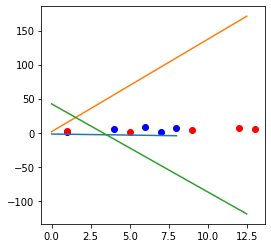

erreur :  0.4192291108515065


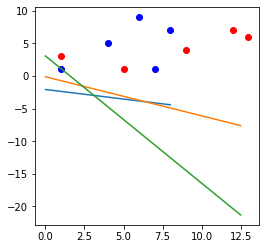

erreur :  0.40551522321023836


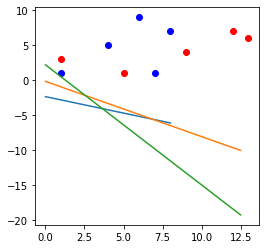

erreur :  0.4173590368104804


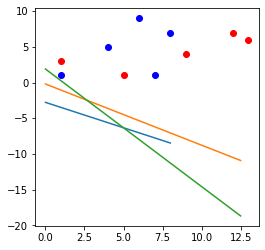

erreur :  0.42784429872853924


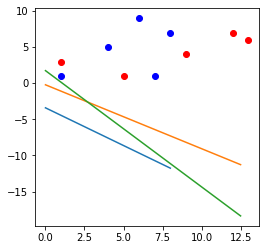

erreur :  0.4351711223461651


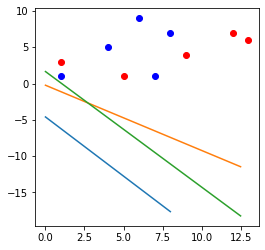

erreur :  0.4404060925054074


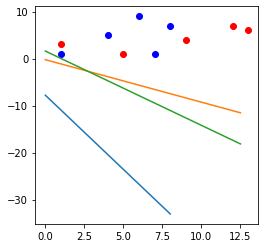

erreur :  0.44490688613962426


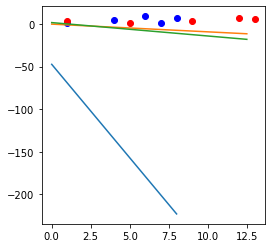

erreur :  0.449852081548652


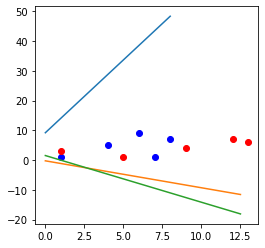

erreur :  0.45614607095060317


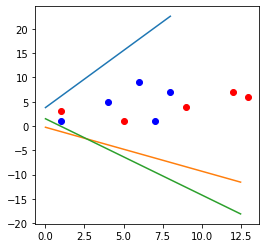

erreur :  0.46317417794596866


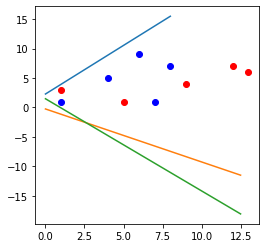

erreur :  0.46703954271295295


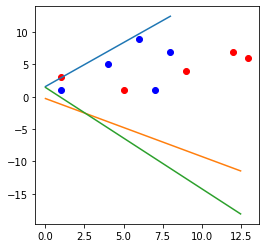

erreur :  0.4647099890080867


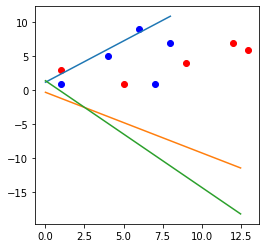

erreur :  0.45765265935651506


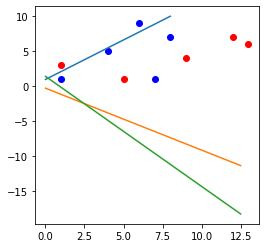

erreur :  0.4485662158367827


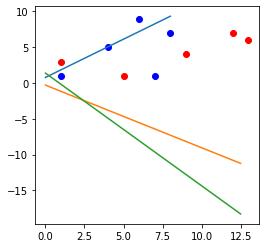

erreur :  0.4392339876027199


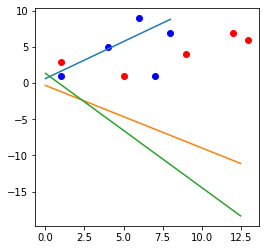

erreur :  0.43057583284522866


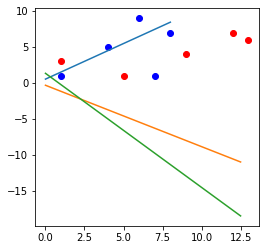

erreur :  0.4231932319287911


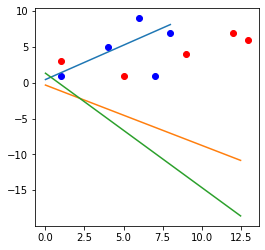

erreur :  0.41786308827543744


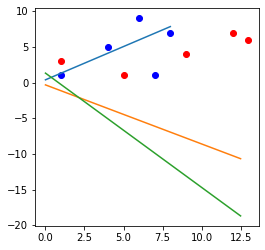

erreur :  0.4156938222263144


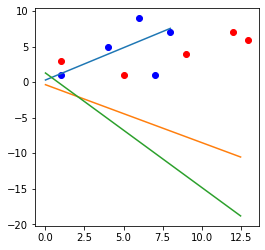

erreur :  0.4179500871737522


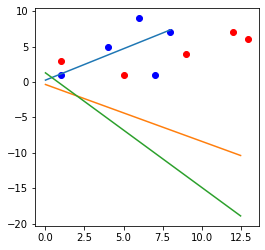

erreur :  0.4257286721102424


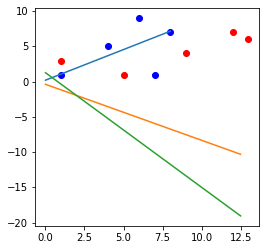

erreur :  0.43962325578614475


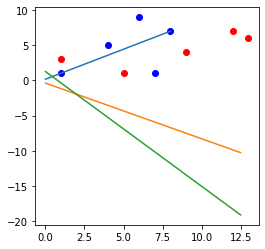

erreur :  0.45949313733290936


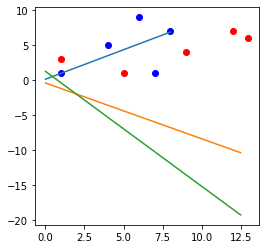

erreur :  0.48444018492777896


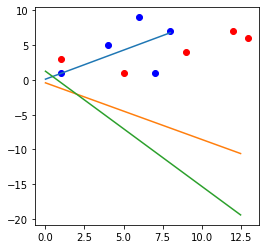

erreur :  0.512985605116184


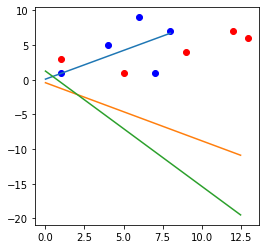

erreur :  0.5433187407252766


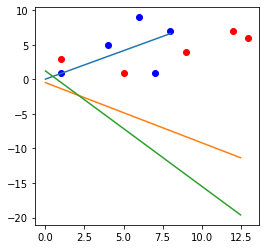

erreur :  0.5735054483681933


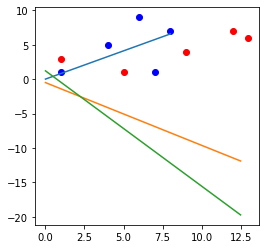

erreur :  0.6016217763421255


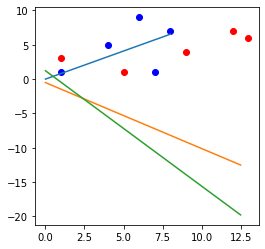

erreur :  0.6258264780188247


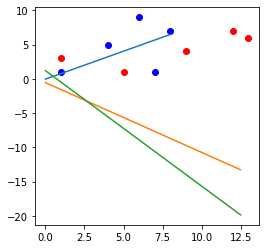

erreur :  0.644423694119907


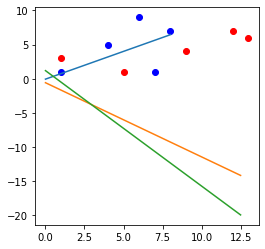

erreur :  0.6559873132969627


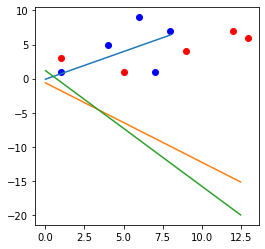

erreur :  0.6595925497622559


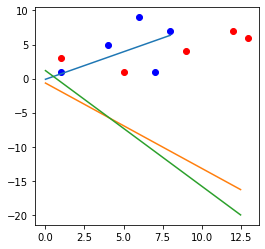

erreur :  0.6551195073459237


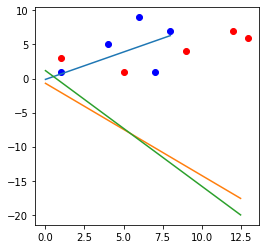

erreur :  0.6434704819108812


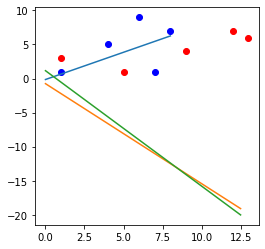

erreur :  0.62646961331655


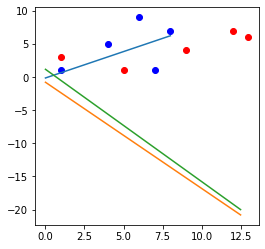

erreur :  0.6063569441717415


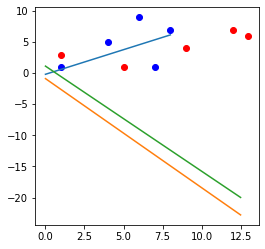

erreur :  0.5851297915207084


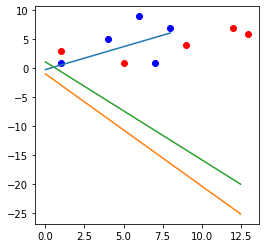

erreur :  0.5641406489675466


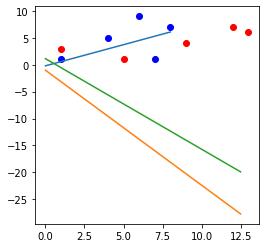

erreur :  0.5440950207274367


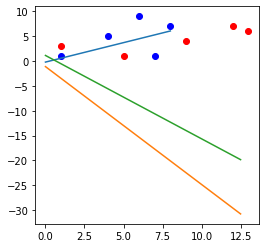

erreur :  0.5252624339503755


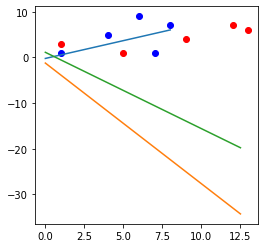

erreur :  0.5076831919193814


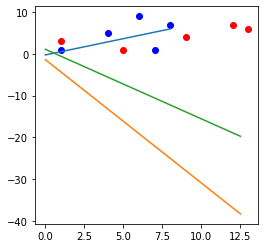

erreur :  0.49129612637749326


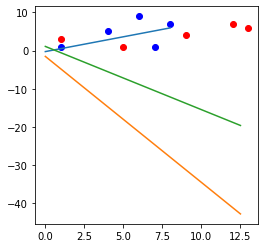

erreur :  0.4760030117871757


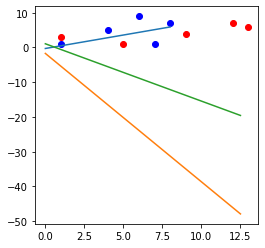

erreur :  0.4616982575447453


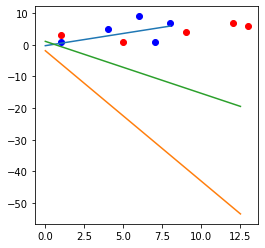

erreur :  0.4482817375519045


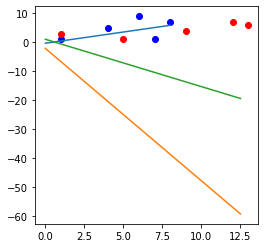

erreur :  0.4356636448304648


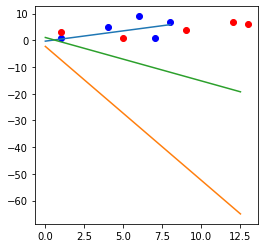

erreur :  0.42376560837215965


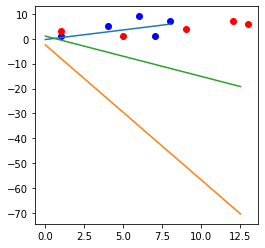

erreur :  0.41252011724972876


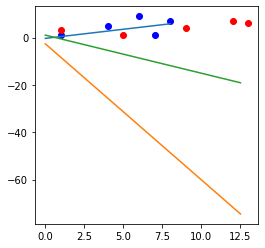

erreur :  0.40186926042432647


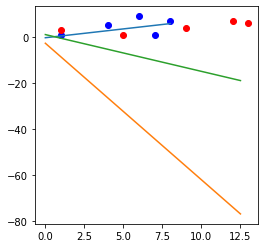

erreur :  0.39176328335469807


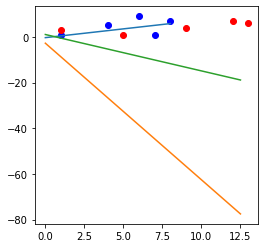

erreur :  0.38215920335371756


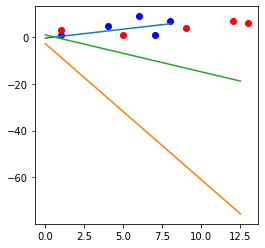

erreur :  0.37301958883126224


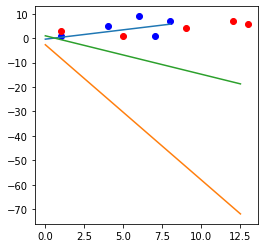

erreur :  0.36431153489794627


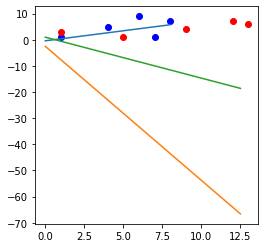

erreur :  0.3560058305630993


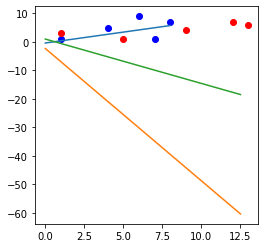

erreur :  0.3480762955854011


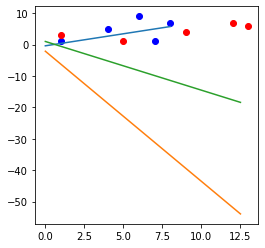

erreur :  0.3404992591195711


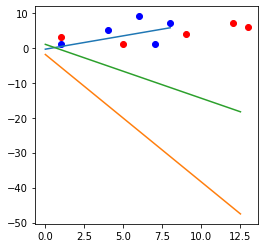

erreur :  0.33325315240237235


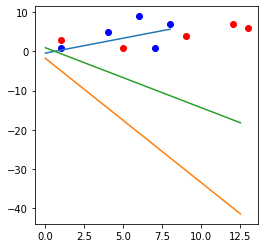

erreur :  0.32631819070801615


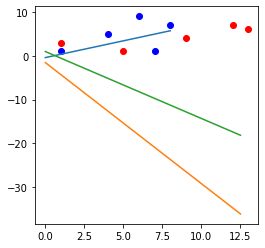

erreur :  0.3196761238647545


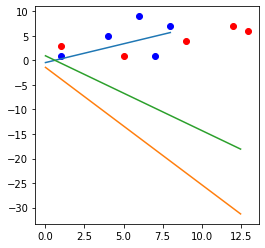

erreur :  0.31331003877552865


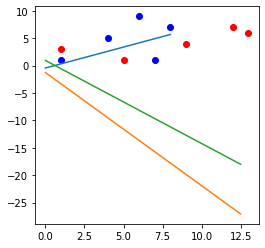

erreur :  0.30720420114232905


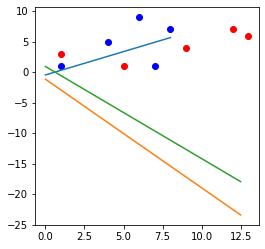

erreur :  0.30134392676872496


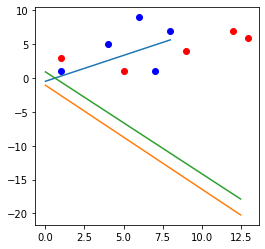

erreur :  0.29571547537936776


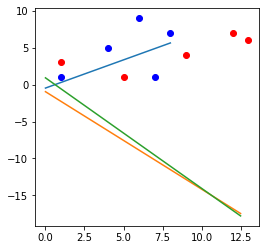

erreur :  0.29030596189990515


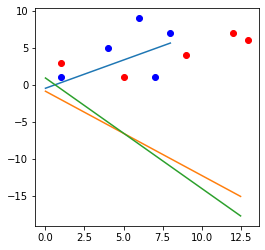

erreur :  0.2851032816680097


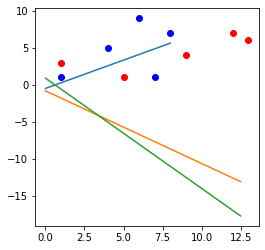

erreur :  0.2800960471827369


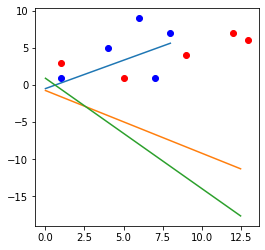

erreur :  0.27527353482497496


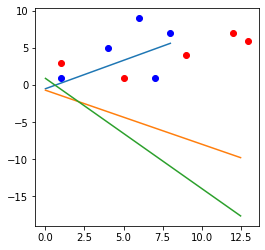

erreur :  0.27062564056170124


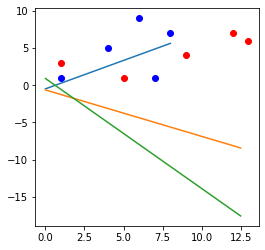

erreur :  0.2661428440318027


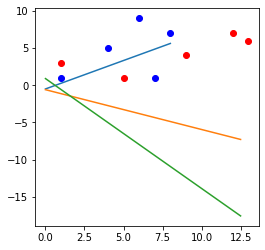

erreur :  0.26181618063640333


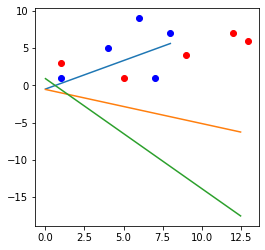

erreur :  0.25763722134312644


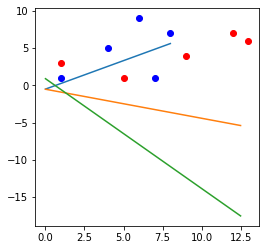

erreur :  0.25359805987041206


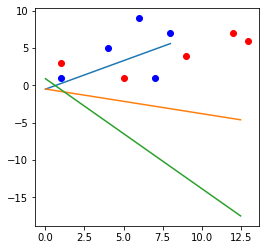

erreur :  0.24969130674482493


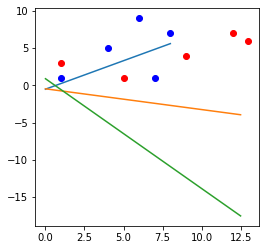

erreur :  0.2459100894168247


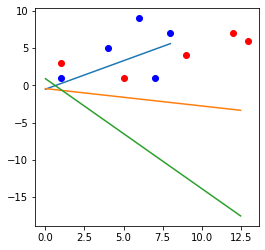

erreur :  0.24224805717646405


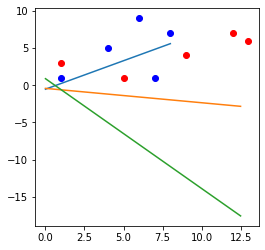

erreur :  0.2386993890406482


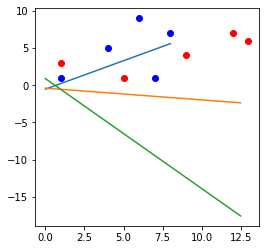

erreur :  0.23525880212177044


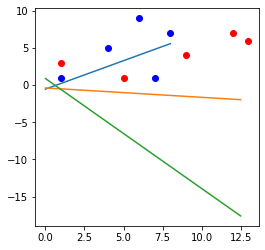

erreur :  0.23192155730351116


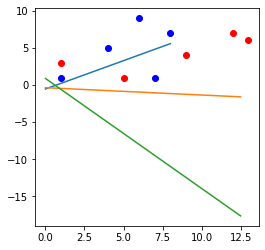

erreur :  0.2286834584555385


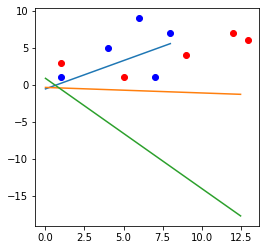

erreur :  0.225540841065601


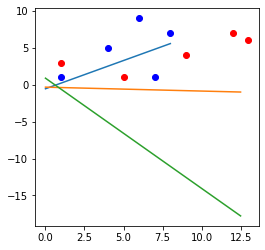

erreur :  0.22249054622492487


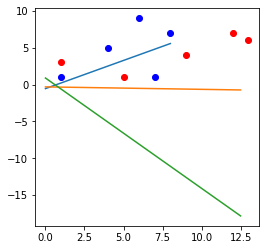

erreur :  0.21952987651891012


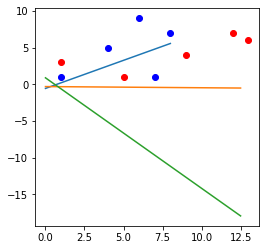

erreur :  0.21665653162441478


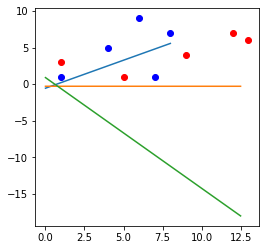

erreur :  0.21386852324924563


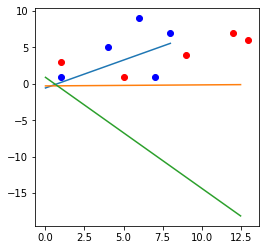

erreur :  0.21116407127773593


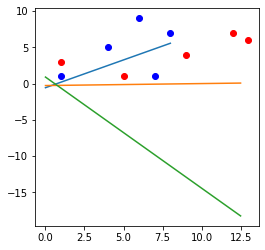

erreur :  0.20854148530034092


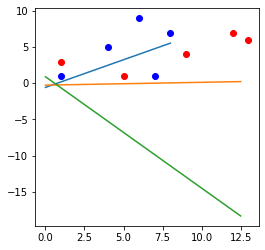

erreur :  0.20599903774750317


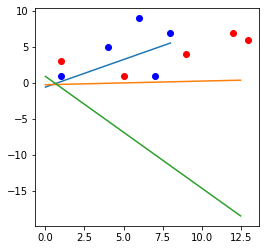

erreur :  0.20353483629753819


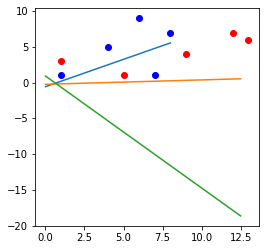

erreur :  0.20114670386274264


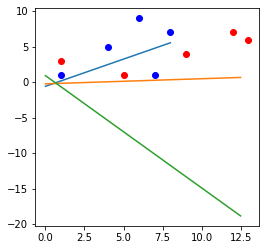

erreur :  0.198832074183886


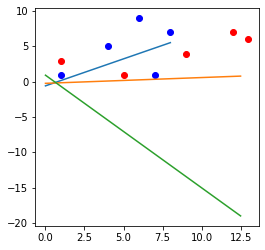

erreur :  0.19658790992122954


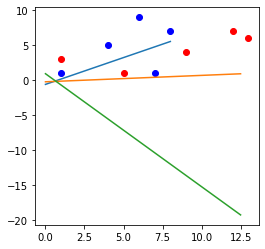

erreur :  0.1944106483040646


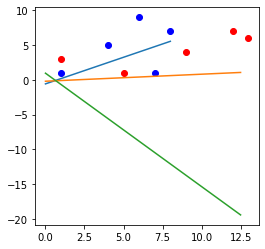

erreur :  0.19229617722315898


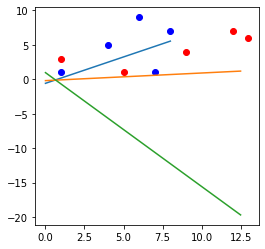

erreur :  0.19023984256794946


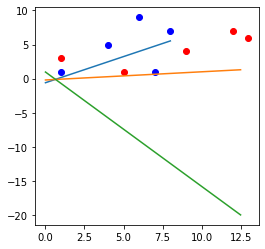

erreur :  0.18823648607091398


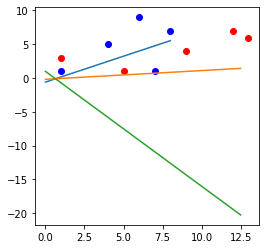

erreur :  0.18628051220337843


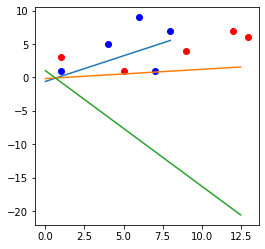

erreur :  0.1843659827211854


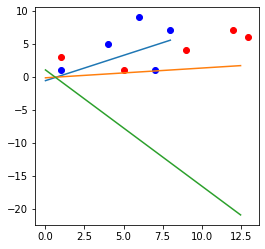

erreur :  0.18248673785609468


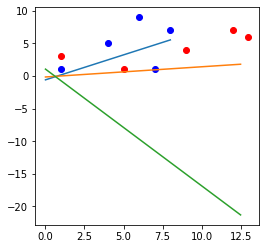

erreur :  0.18063654318175007


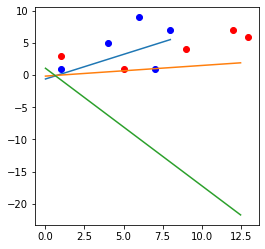

erreur :  0.1788092601081976


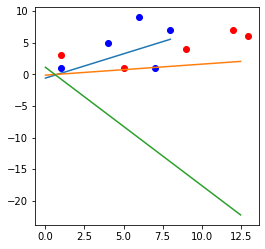

erreur :  0.17699903531919922


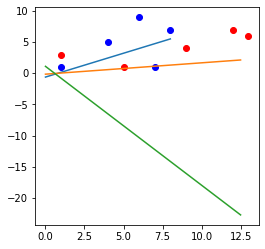

erreur :  0.17520050038540289


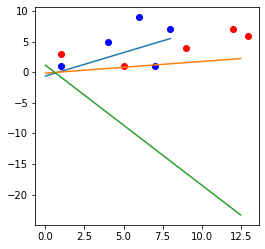

erreur :  0.1734089681079185


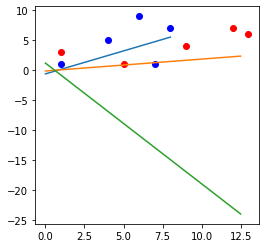

erreur :  0.1716206083034023


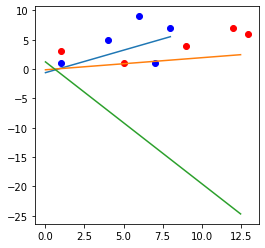

erreur :  0.1698325843146244


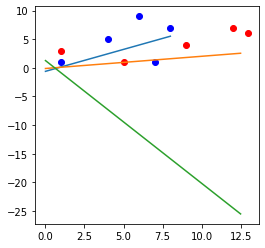

erreur :  0.1680431336260296


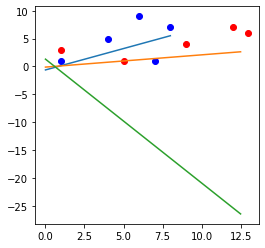

erreur :  0.1662515816763376


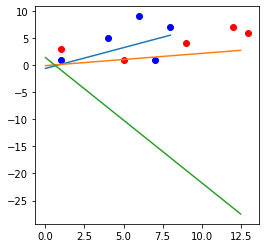

erreur :  0.1644582862205738


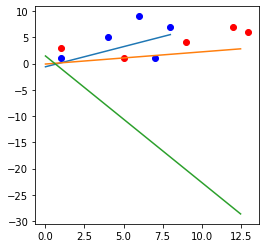

erreur :  0.16266451851937425


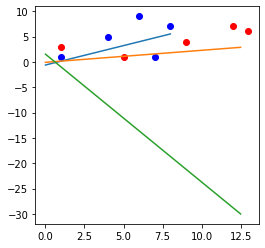

erreur :  0.16087229521932572


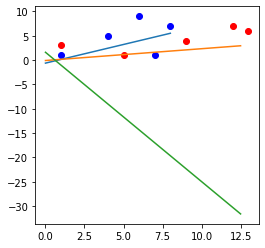

erreur :  0.15908417958089663


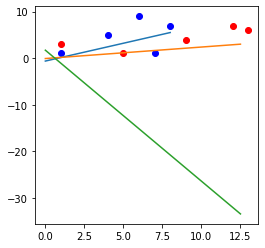

erreur :  0.1573030721587826


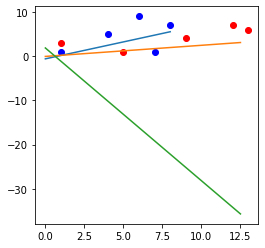

erreur :  0.15553200943691403


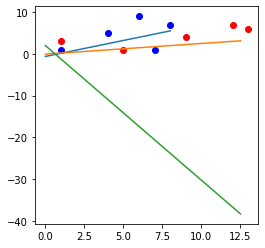

erreur :  0.15377398509289134


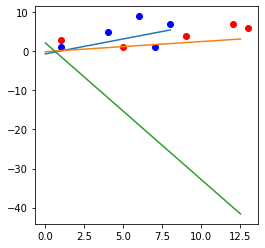

erreur :  0.15203180351729378


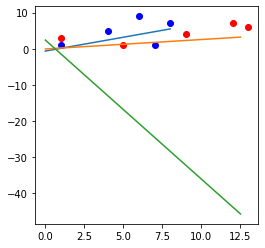

erreur :  0.150307969870779


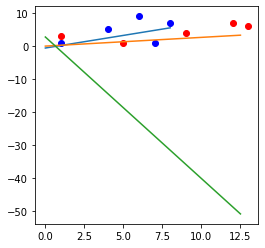

erreur :  0.1486046160524808


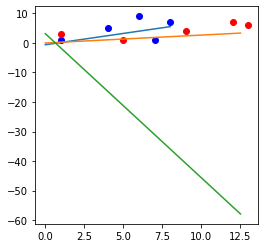

erreur :  0.14692345796184533


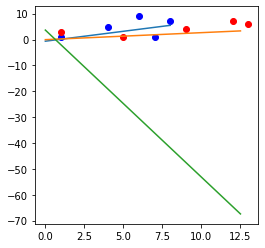

erreur :  0.1452657766140961


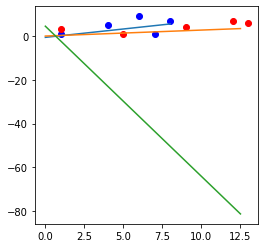

erreur :  0.1436324140807938


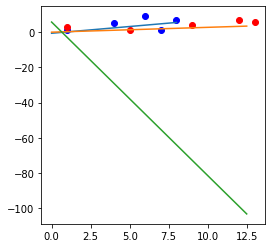

erreur :  0.14202377483280265


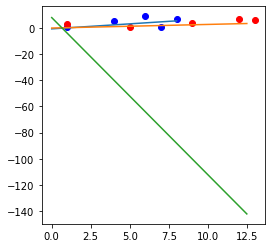

erreur :  0.14043982384560424


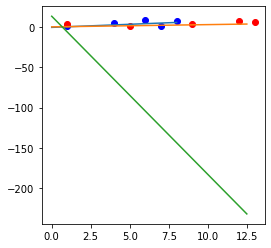

erreur :  0.13888007492737


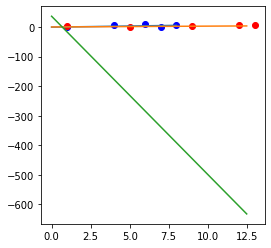

erreur :  0.13734356652930646


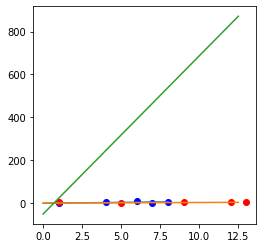

erreur :  0.13582882828889845


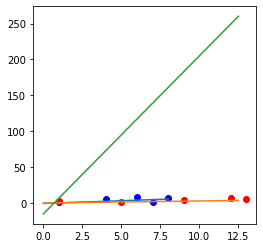

erreur :  0.13433384980165647


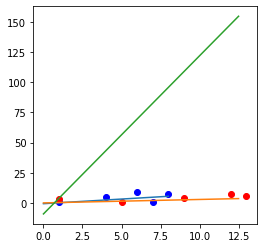

erreur :  0.13285607225121304


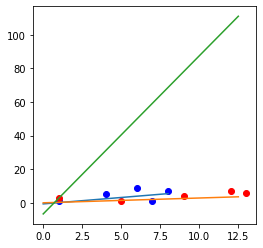

erreur :  0.1313924298828645


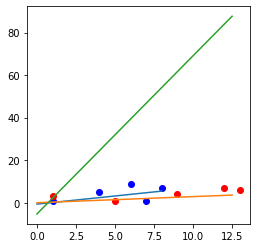

erreur :  0.12993946646615215


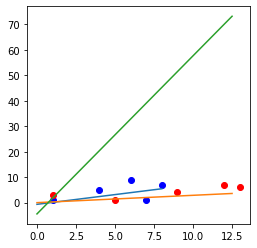

erreur :  0.12849353774183628


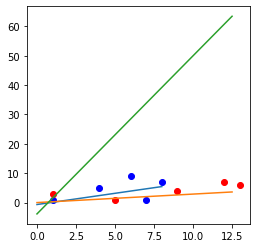

erreur :  0.12705108592989942


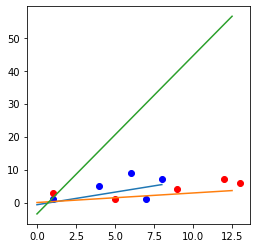

erreur :  0.12560894569587946


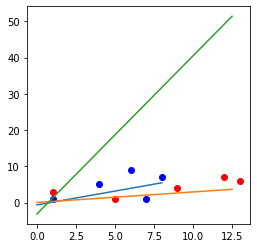

erreur :  0.12416462505984999


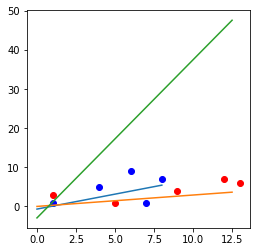

erreur :  0.12271650781901919


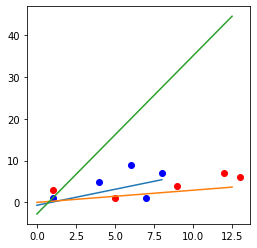

erreur :  0.12126394469136074


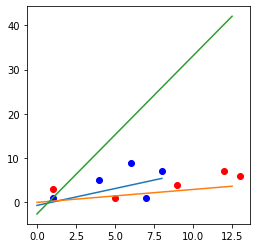

erreur :  0.11980722889146056


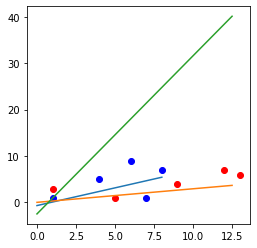

erreur :  0.11834747676925522


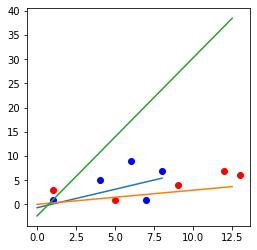

erreur :  0.11688644825092331


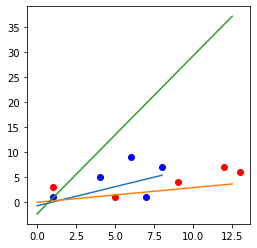

erreur :  0.11542634403256678


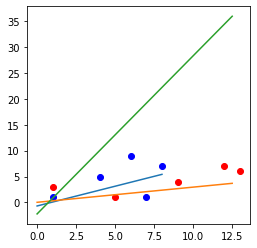

erreur :  0.1139696100772899


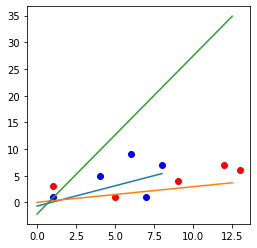

erreur :  0.11251876963514136


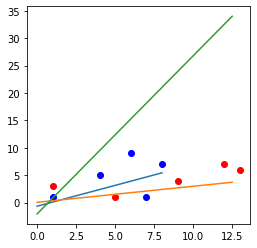

erreur :  0.11107629261783028


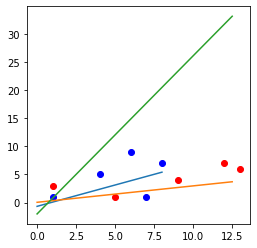

erreur :  0.10964450394027347


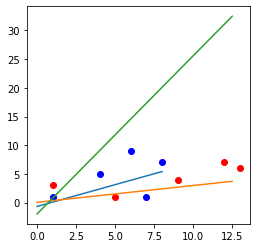

erreur :  0.10822552710442647


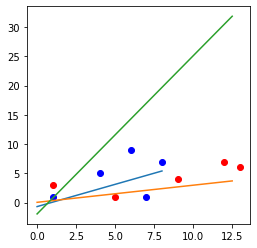

erreur :  0.10682125659697662


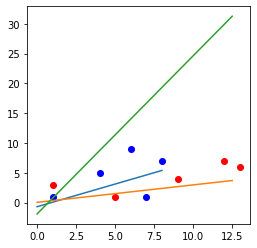

erreur :  0.10543335192165085


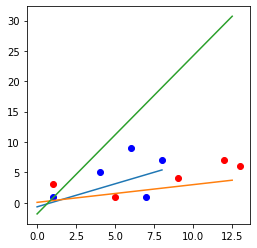

erreur :  0.10406324654717745


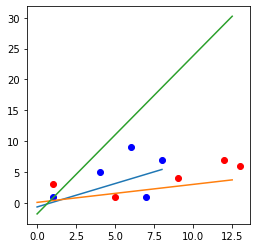

erreur :  0.10271216610687366


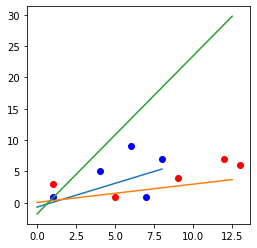

erreur :  0.101381151405689


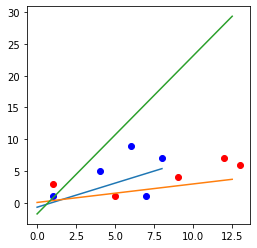

erreur :  0.10007108292282978


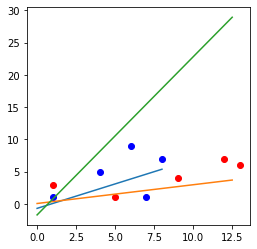

erreur :  0.09878270442929848


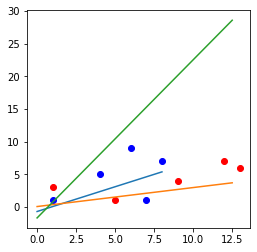

erreur :  0.09751664405015033


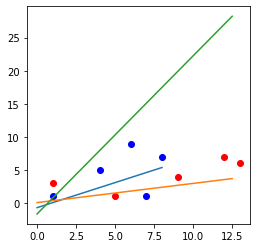

erreur :  0.09627343162566547


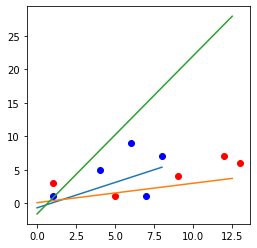

erreur :  0.0950535116207818


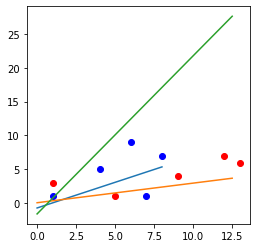

erreur :  0.09385725115553559


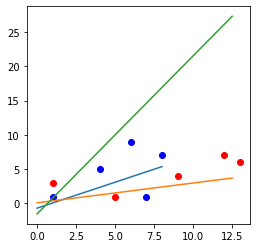

erreur :  0.0926849430246102


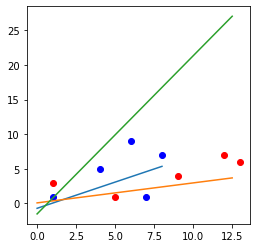

erreur :  0.09153680386518431


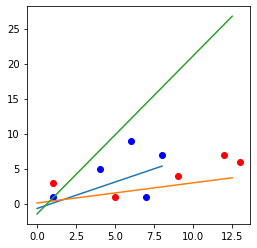

erreur :  0.09041296792247053


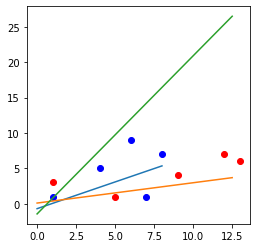

erreur :  0.08931347713871474


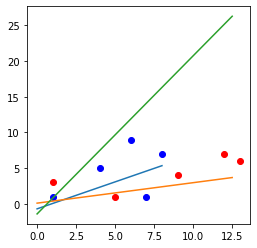

erreur :  0.08823826853160857


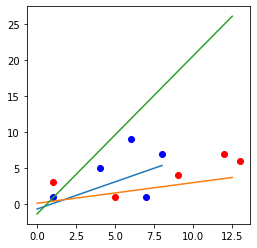

erreur :  0.08718716000805493


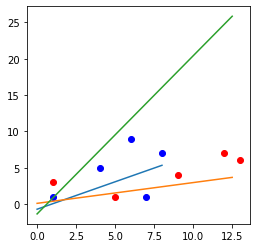

erreur :  0.08615983586025708


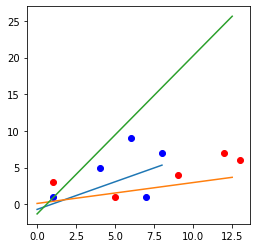

erreur :  0.08515583320426946


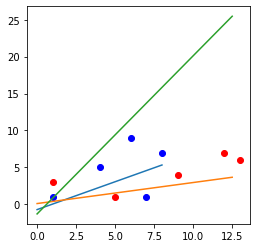

erreur :  0.08417453054900799


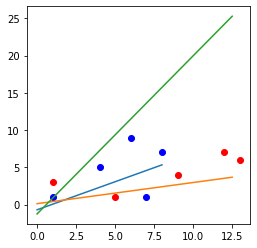

erreur :  0.08321513953937011


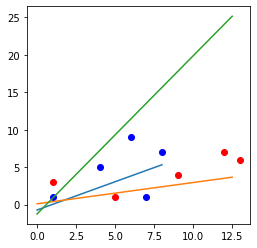

erreur :  0.08227670072070103


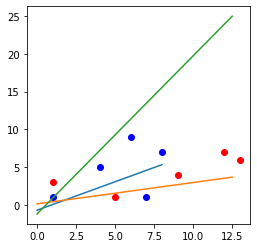

erreur :  0.08135808394635313


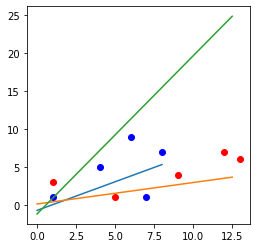

erreur :  0.08045799381701195


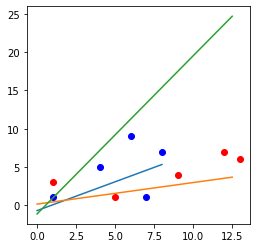

erreur :  0.07957498031603462


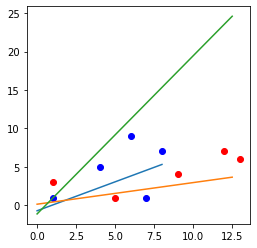

erreur :  0.07870745459867169


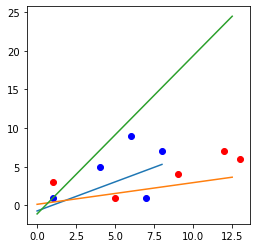

erreur :  0.07785370970676816


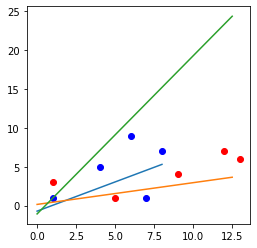

erreur :  0.07701194581101253


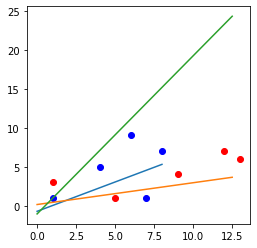

erreur :  0.07618029942404043


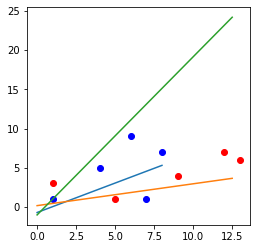

erreur :  0.07535687587450499


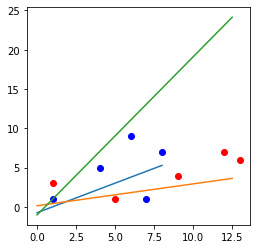

erreur :  0.07453978418352039


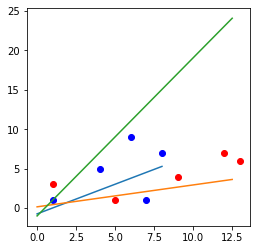

erreur :  0.07372717334515254


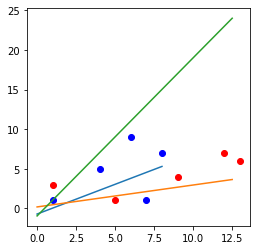

erreur :  0.07291726889245694


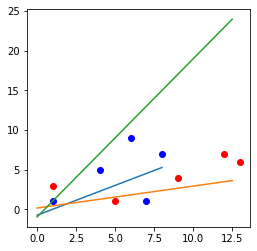

erreur :  0.07210840854474465


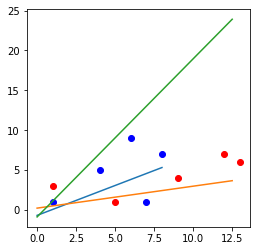

erreur :  0.07129907569636555


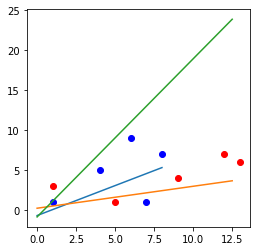

erreur :  0.07048792953586842


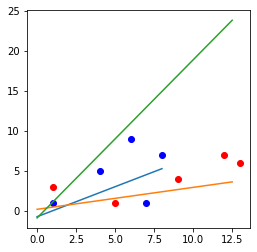

erreur :  0.06967383068498369


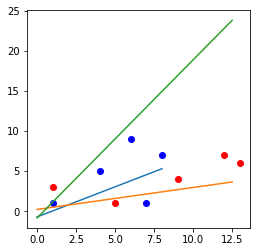

erreur :  0.06885586141911942


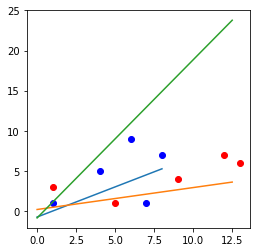

erreur :  0.06803333976632205


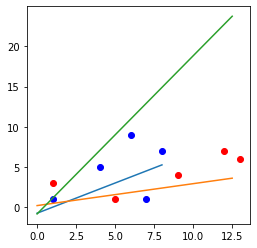

erreur :  0.0672058270632173


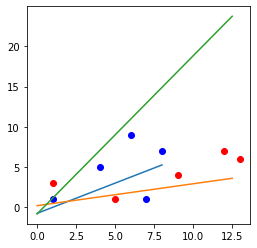

erreur :  0.06637312885248749


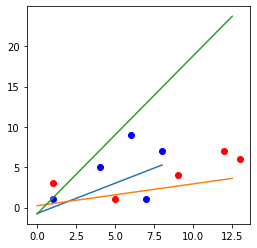

erreur :  0.06553528931268027


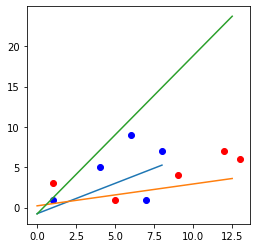

erreur :  0.06469257969428734


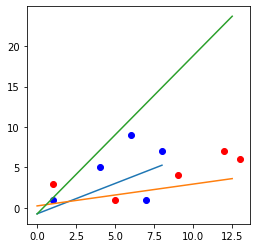

erreur :  0.06384548147644122


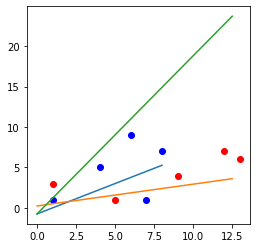

erreur :  0.06299466514210375


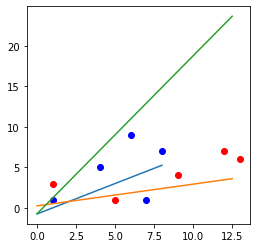

erreur :  0.06214096558857703


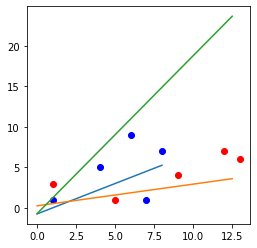

erreur :  0.06128535524317466


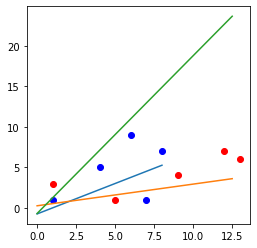

erreur :  0.06042891594519221


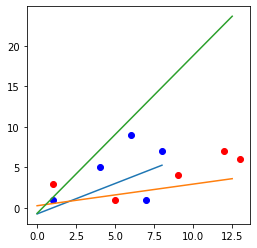

erreur :  0.059572810593279


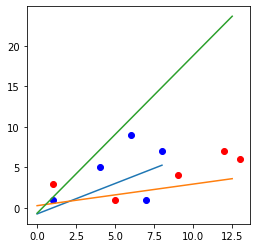

erreur :  0.05871825545313176


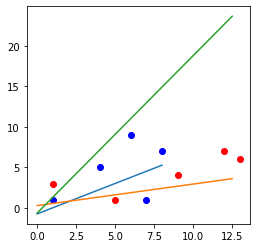

erreur :  0.05786649388665326


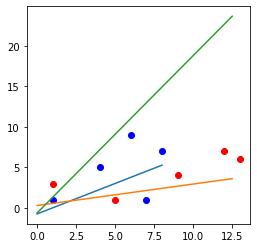

erreur :  0.05701877211258291


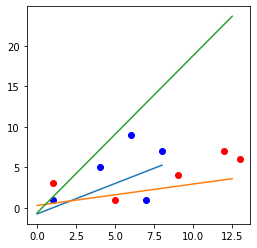

erreur :  0.0561763174516857


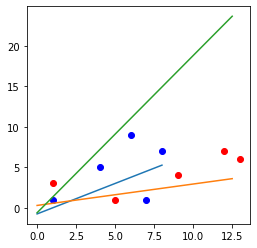

erreur :  0.05534031935641718


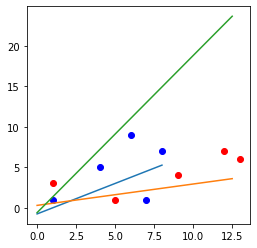

erreur :  0.054511913383206254


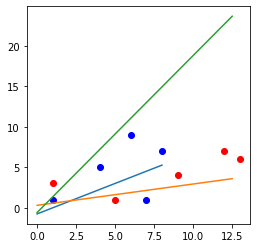

erreur :  0.053692168140459545


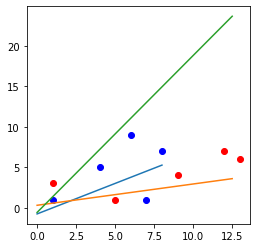

erreur :  0.0528820751403513


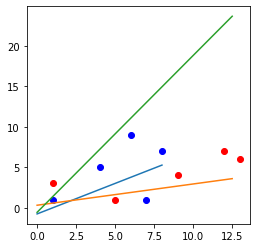

erreur :  0.05208254139883524


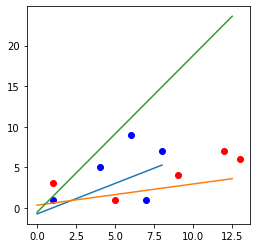

erreur :  0.05129438456594427


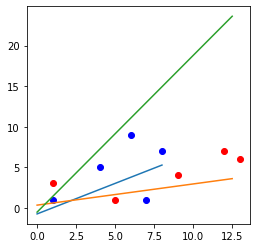

erreur :  0.05051833032607778


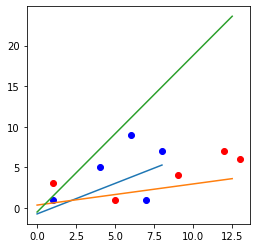

erreur :  0.04975501178342423


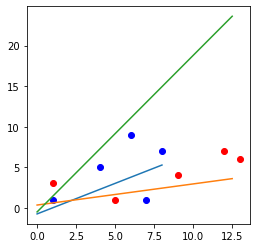

erreur :  0.04900497053839605


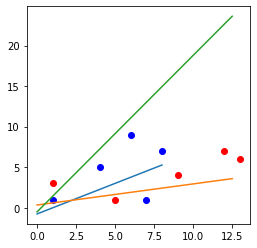

erreur :  0.04826865916413513


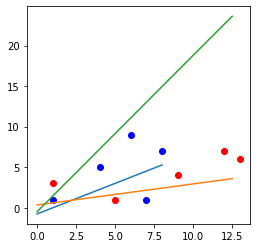

erreur :  0.047546444804935084


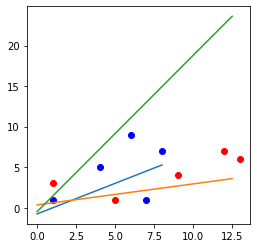

erreur :  0.04683861363825121


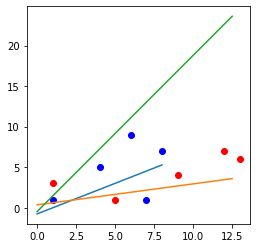

erreur :  0.046145375966450713


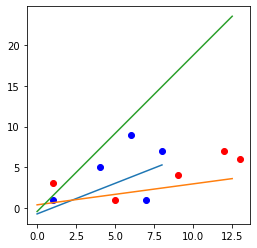

erreur :  0.045466871731552935


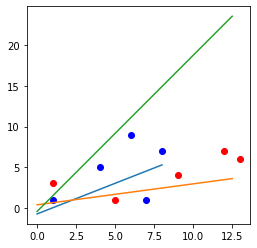

erreur :  0.04480317627431449


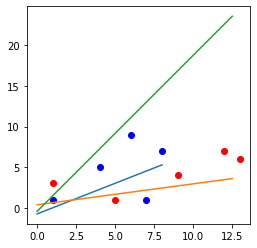

erreur :  0.044154306186809225


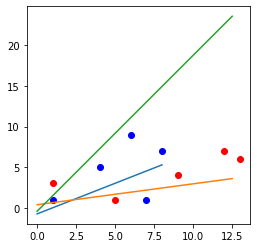

erreur :  0.04352022513416712


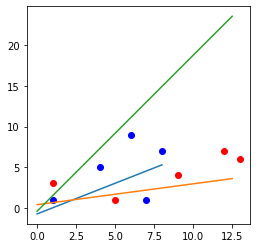

erreur :  0.0429008495457249


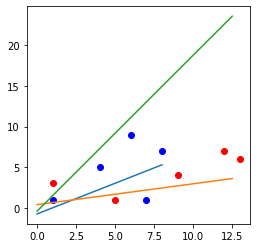

erreur :  0.042296054098045516


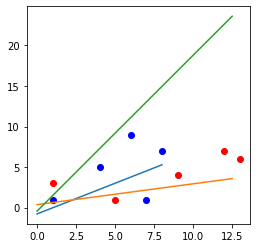

erreur :  0.041705676931925374


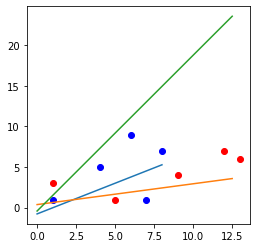

erreur :  0.04112952456249215


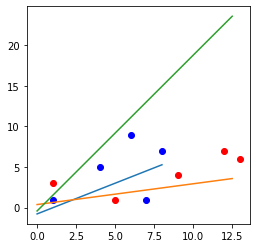

erreur :  0.04056737645593569


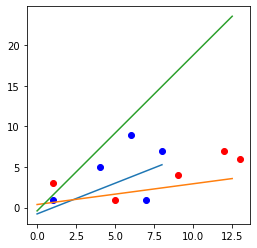

erreur :  0.04001898925841804


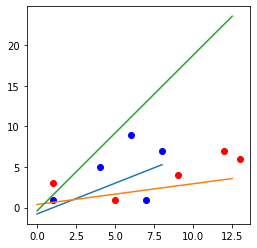

erreur :  0.03948410067246212


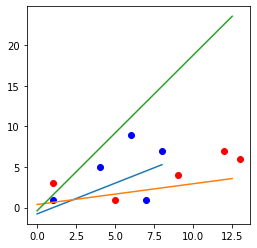

erreur :  0.03896243298390586


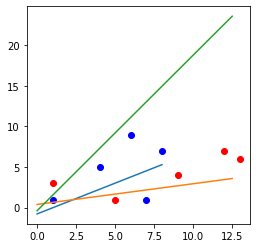

erreur :  0.038453696248496844


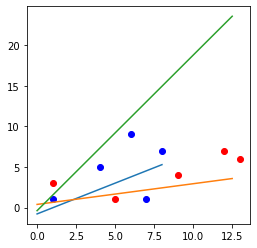

erreur :  0.037957591151724576


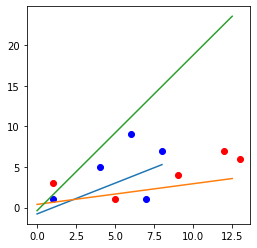

erreur :  0.037473811558677066


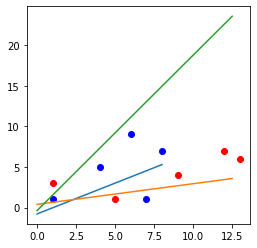

erreur :  0.037002046772868516


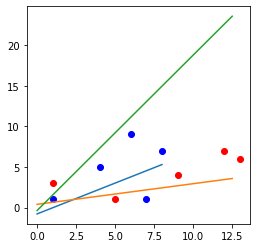

erreur :  0.03654198352425577


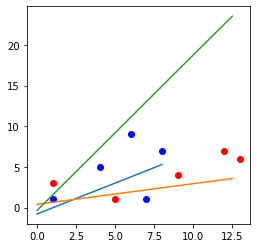

erreur :  0.03609330770722801


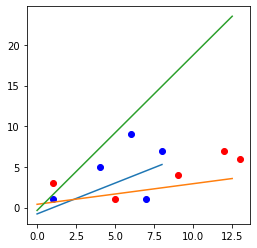

erreur :  0.03565570588938924


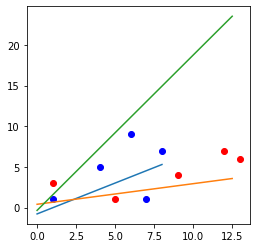

erreur :  0.03522886661154037


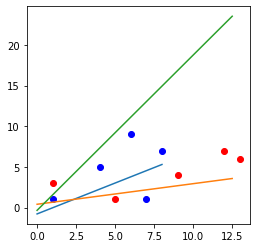

erreur :  0.03481248149857291


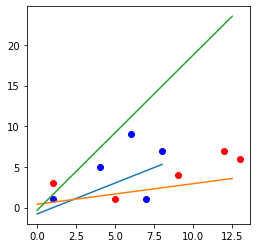

erreur :  0.034406246200036836


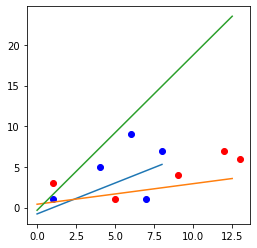

erreur :  0.034009861178073496


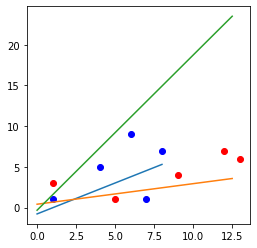

erreur :  0.03362303235921935


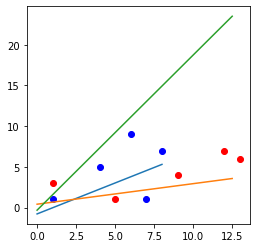

erreur :  0.03324547166537788


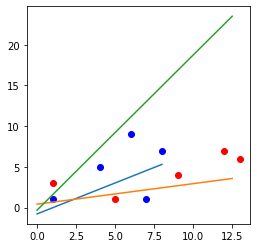

erreur :  0.03287689743801799


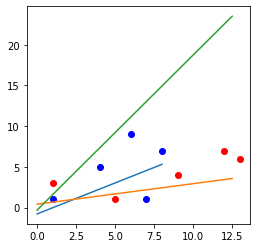

erreur :  0.032517034768458845


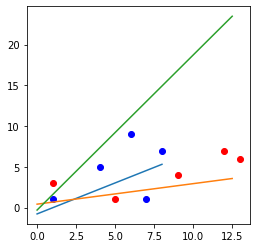

erreur :  0.032165615745929965


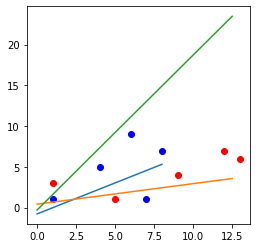

erreur :  0.031822379633978645


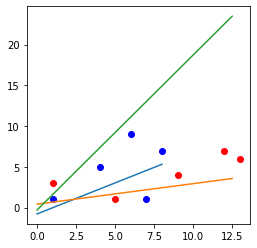

erreur :  0.031487072984741904


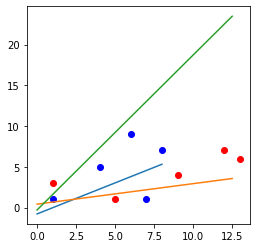

erreur :  0.03115944969963567


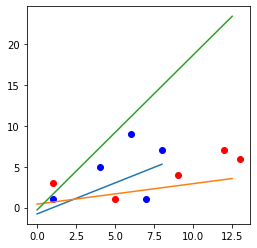

erreur :  0.030839271044073004


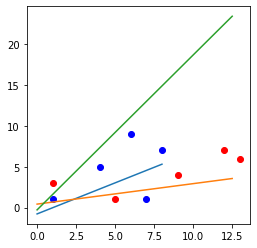

erreur :  0.03052630562301417


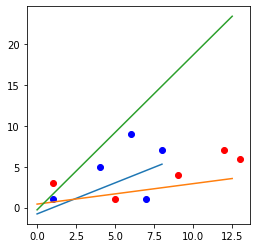

erreur :  0.03022032932336448


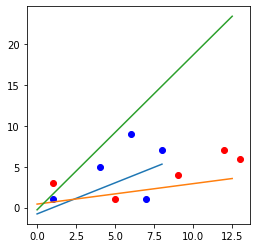

erreur :  0.029921125228542435


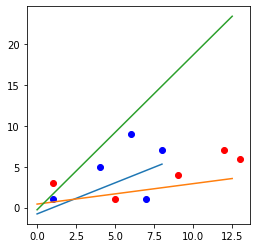

erreur :  0.029628483509915853


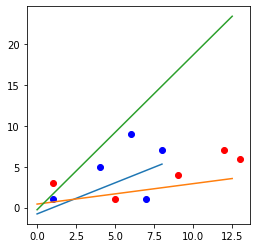

erreur :  0.029342201299214034


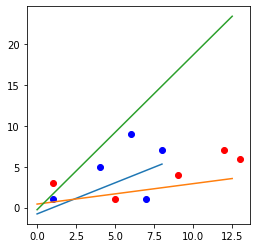

erreur :  0.02906208254552992


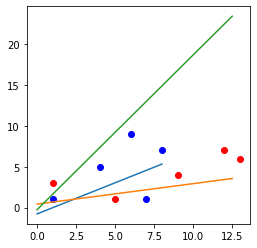

erreur :  0.02878793786005335


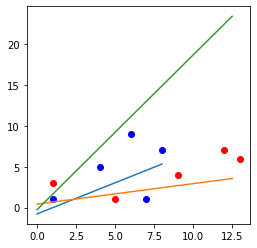

erreur :  0.028519584351267436


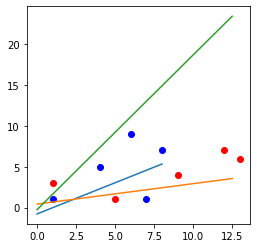

erreur :  0.028256845452980787


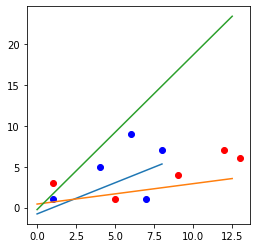

erreur :  0.02799955074723397


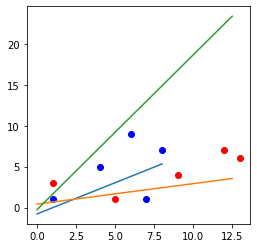

erreur :  0.027747535783838883


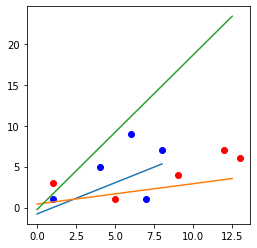

erreur :  0.02750064189804919


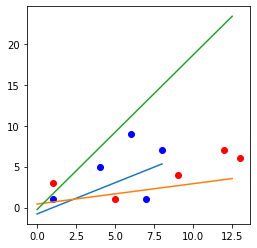

erreur :  0.0272587160276392


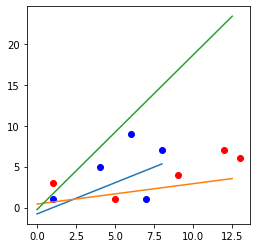

erreur :  0.027021610530476452


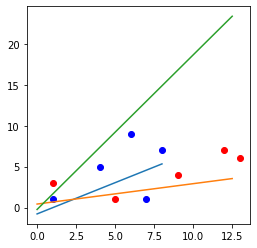

erreur :  0.026789183003486174


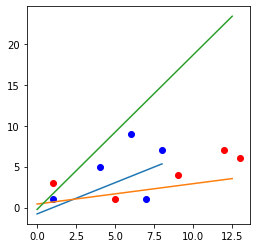

erreur :  0.026561296103771576


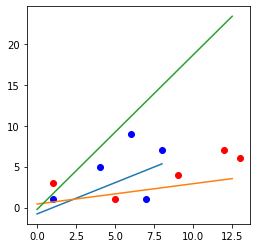

erreur :  0.026337817372512524


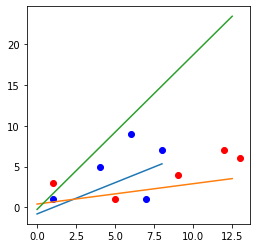

erreur :  0.026118619062150985


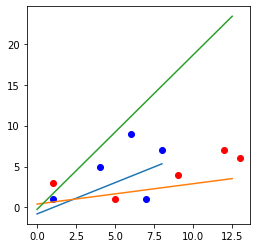

erreur :  0.025903577967275184


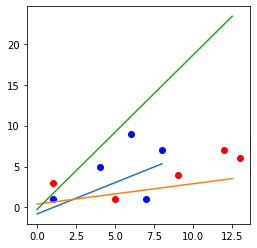

erreur :  0.025692575259524227


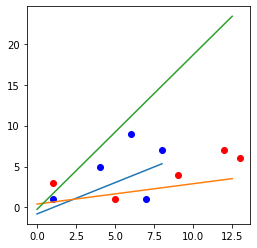

erreur :  0.02548549632676668


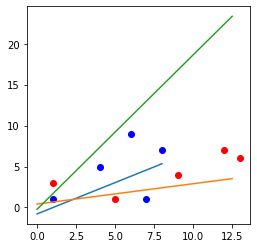

erreur :  0.02528223061673307


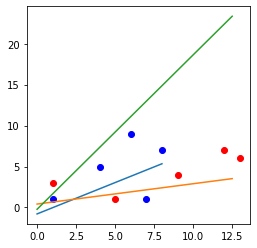

erreur :  0.025082671485237545


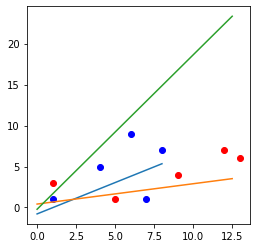

erreur :  0.024886716049070334


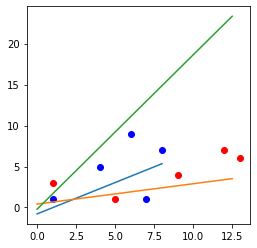

erreur :  0.024694265043603874


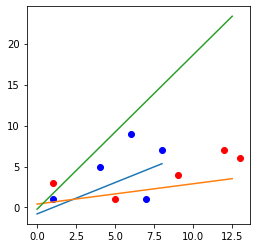

erreur :  0.024505222685123607


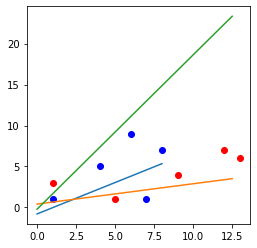

erreur :  0.024319496537867153


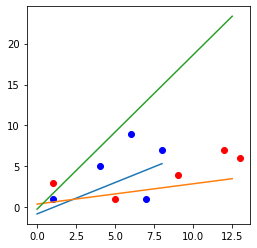

erreur :  0.024136997385724345


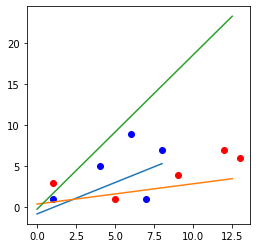

erreur :  0.023957639108543042


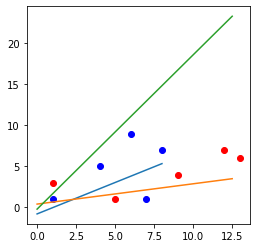

erreur :  0.02378133856295784


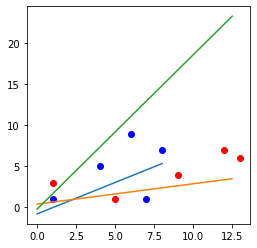

erreur :  0.023608015467653856


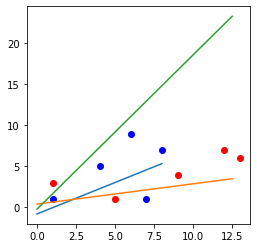

erreur :  0.0234375922929633


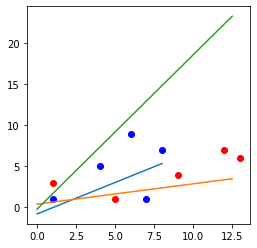

erreur :  0.023269994154686037


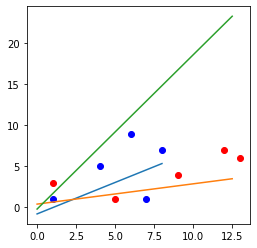

erreur :  0.02310514871201952


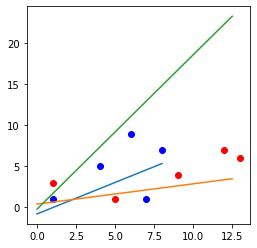

erreur :  0.02294298606947504


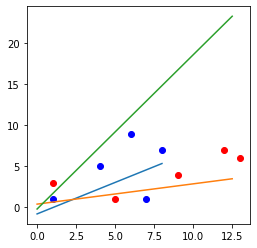

erreur :  0.022783438682662555


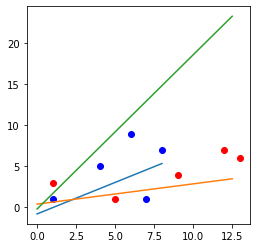

erreur :  0.02262644126781476


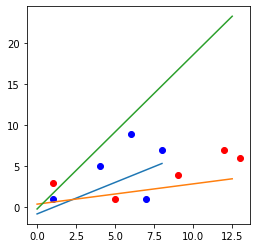

erreur :  0.022471930714926678


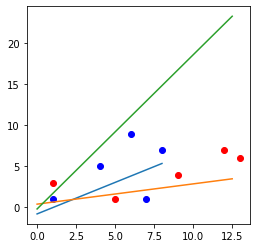

erreur :  0.022319846004387092


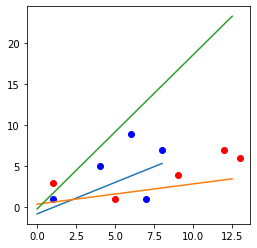

erreur :  0.022170128126972482


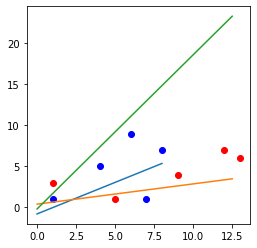

erreur :  0.02202272000708603


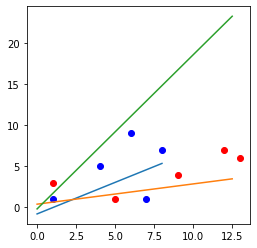

erreur :  0.02187756642911479


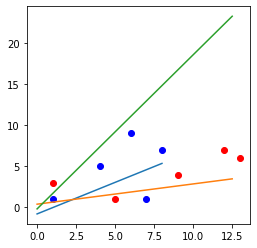

erreur :  0.021734613966789284


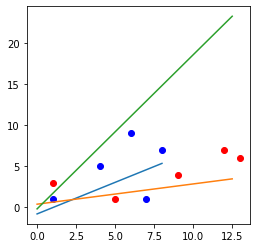

erreur :  0.0215938109154281


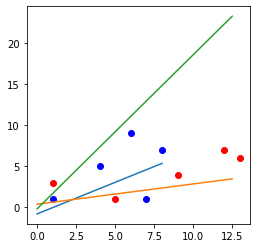

erreur :  0.021455107226954033


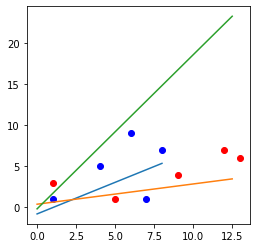

erreur :  0.021318454447569687


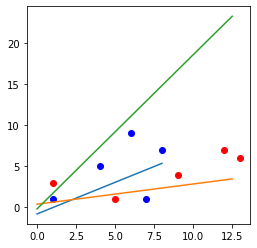

erreur :  0.021183805657986332


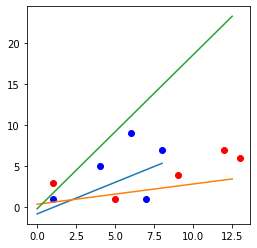

erreur :  0.021051115416103026


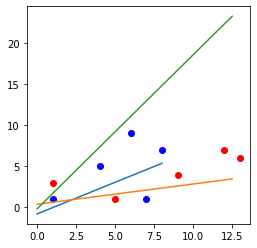

erreur :  0.020920339702031665


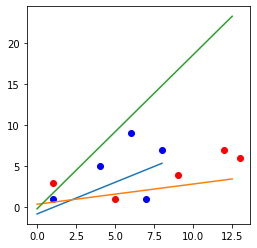

erreur :  0.020791435865374866


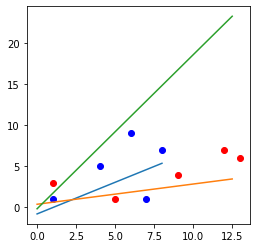

erreur :  0.02066436257465896


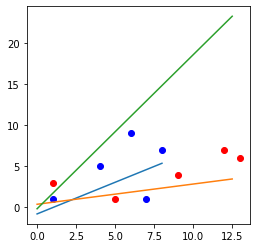

erreur :  0.020539079768833637


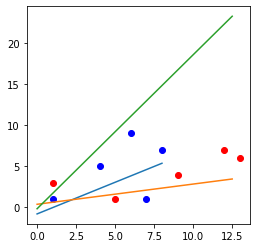

erreur :  0.020415548610750487


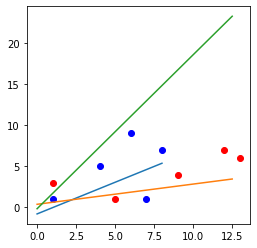

erreur :  0.020293731442536437


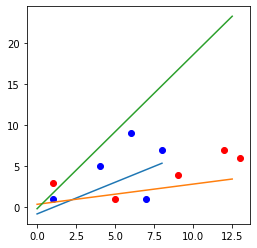

erreur :  0.020173591742780467


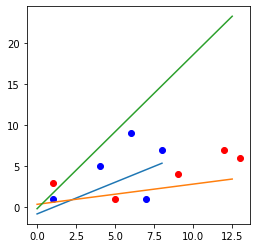

erreur :  0.020055094085458712


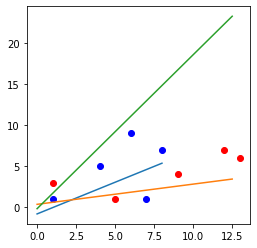

erreur :  0.019938204100520197


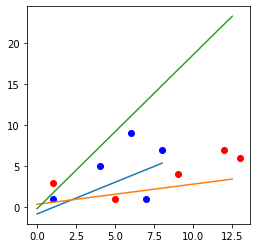

erreur :  0.019822888436064483


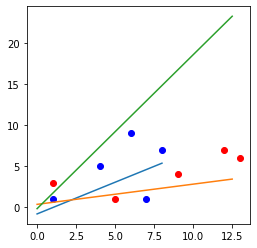

erreur :  0.019709114722040882


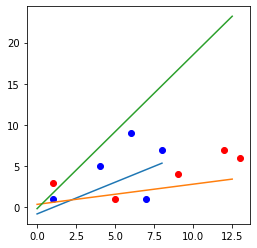

erreur :  0.019596851535406468


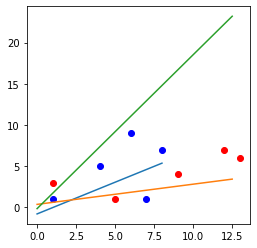

erreur :  0.01948606836667514


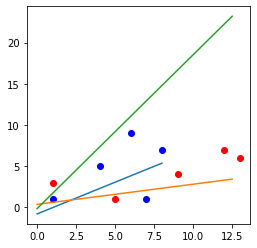

erreur :  0.019376735587803954


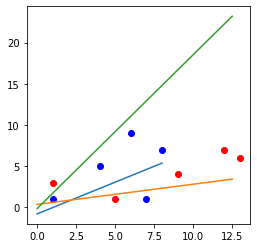

erreur :  0.019268824421353303


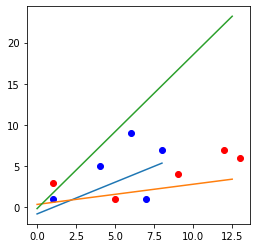

erreur :  0.019162306910870282


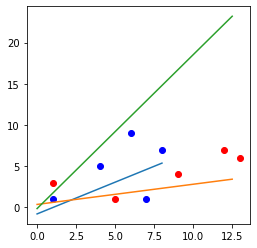

erreur :  0.019057155892438754


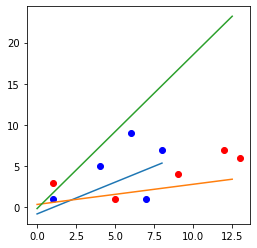

erreur :  0.018953344967349066


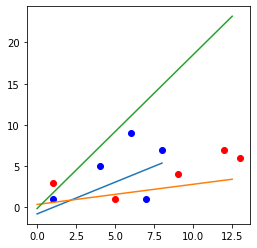

erreur :  0.018850848475837168


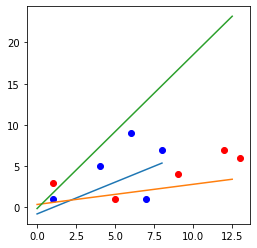

erreur :  0.018749641471847437


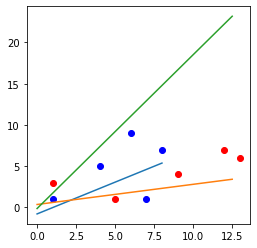

erreur :  0.018649699698775436


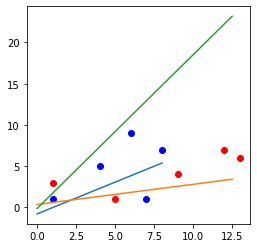

erreur :  0.0185509995661483


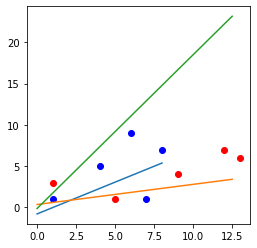

erreur :  0.018453518127201588


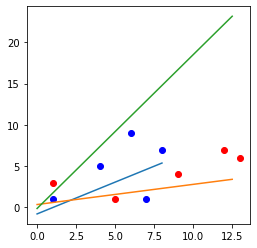

erreur :  0.01835723305731715


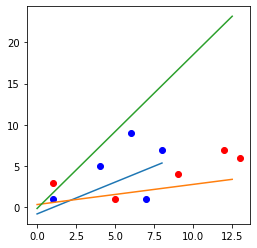

erreur :  0.018262122633280614


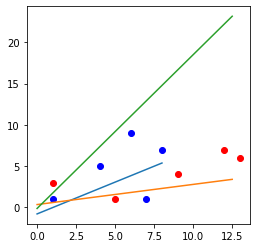

erreur :  0.018168165713327314


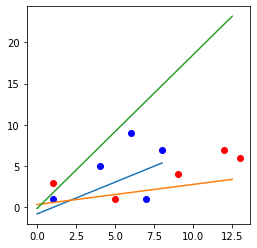

erreur :  0.01807534171794067


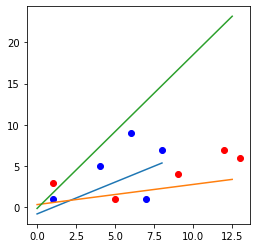

erreur :  0.017983630611372654


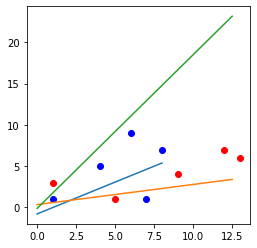

erreur :  0.01789301288385383


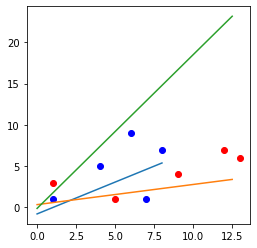

erreur :  0.017803469534465592


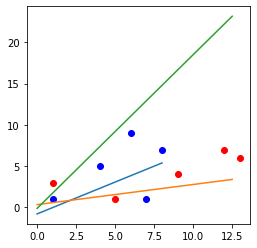

erreur :  0.017714982054644696


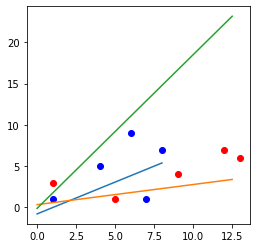

erreur :  0.017627532412295074


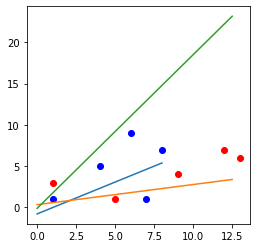

erreur :  0.017541103036479586


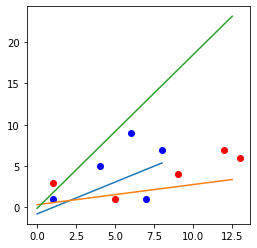

erreur :  0.017455676802668938


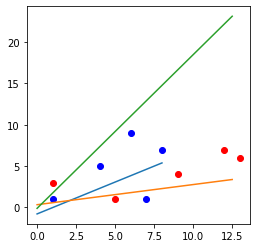

erreur :  0.017371237018523392


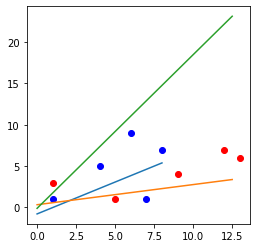

erreur :  0.017287767410184916


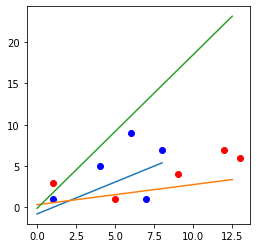

erreur :  0.017205252109058308


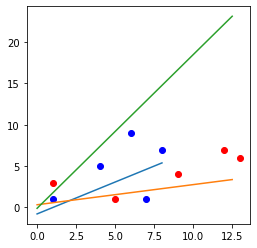

erreur :  0.017123675639063488


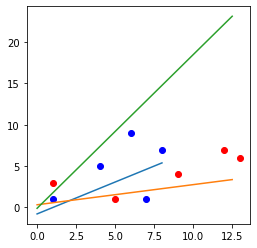

erreur :  0.017043022904333238


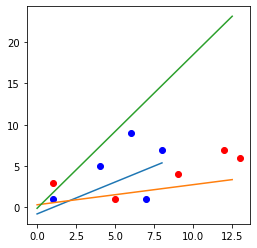

erreur :  0.01696327917734511


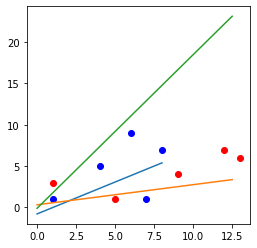

erreur :  0.016884430087464444


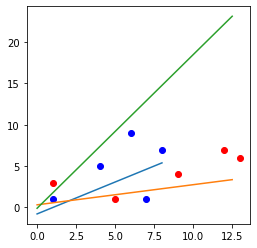

erreur :  0.016806461609884124


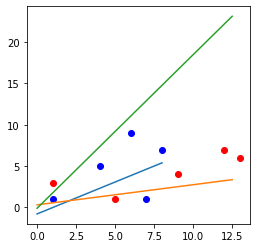

erreur :  0.016729360054942896


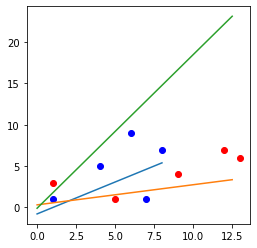

erreur :  0.01665311205780808


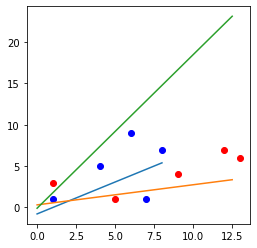

erreur :  0.016577704568507278


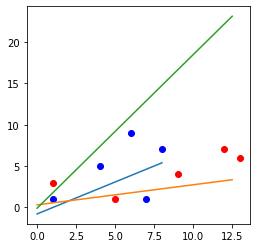

erreur :  0.016503124842294464


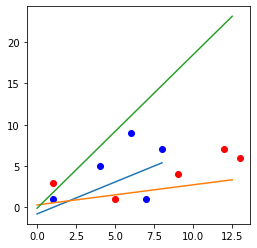

erreur :  0.016429360430337162


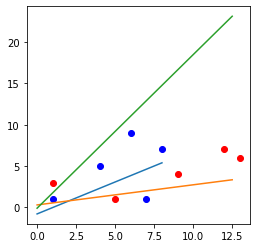

erreur :  0.01635639917071164


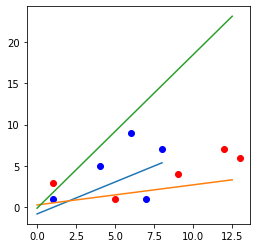

erreur :  0.01628422917969325


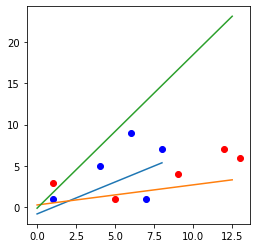

erreur :  0.016212838843330336


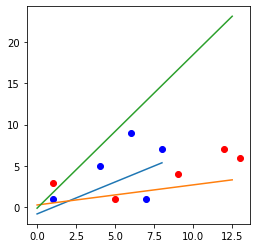

erreur :  0.0161422168092905


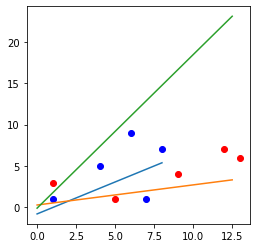

erreur :  0.016072351978966785


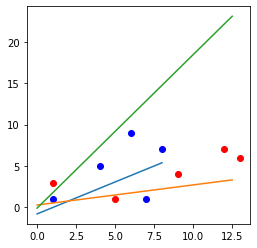

erreur :  0.01600323349983573


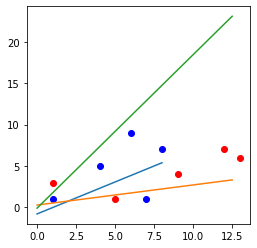

erreur :  0.015934850758054796


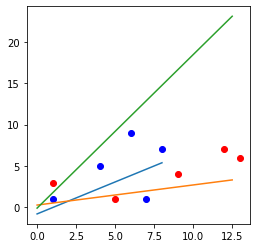

erreur :  0.015867193371291517


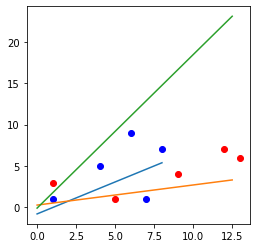

erreur :  0.015800251181773847


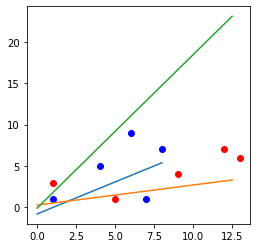

erreur :  0.015734014249552817


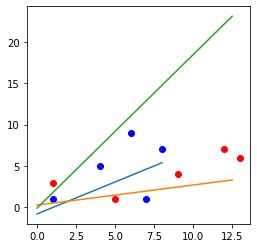

erreur :  0.015668472845971556


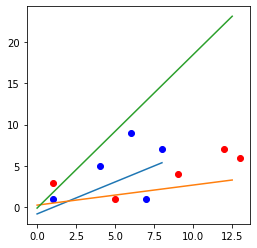

erreur :  0.015603617447328768


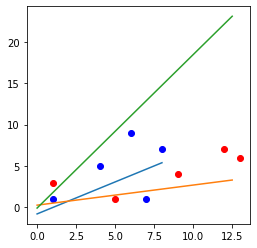

erreur :  0.015539438728731482


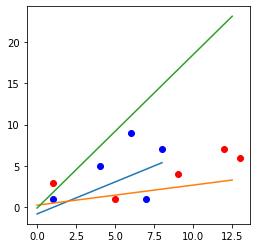

erreur :  0.015475927558129902


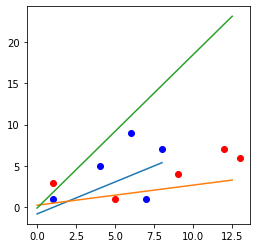

erreur :  0.015413074990525633


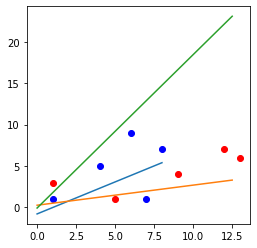

erreur :  0.015350872262347931


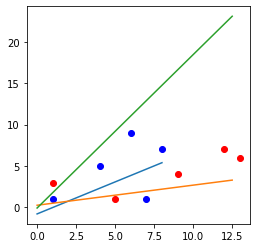

erreur :  0.015289310785990386


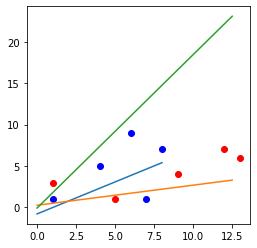

erreur :  0.01522838214450407


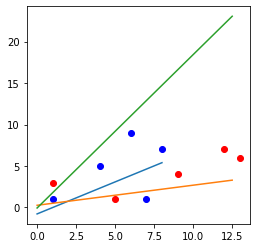

erreur :  0.015168078086437454


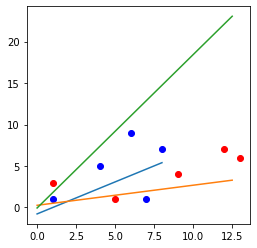

erreur :  0.015108390520822584


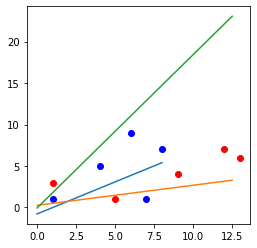

erreur :  0.015049311512295951


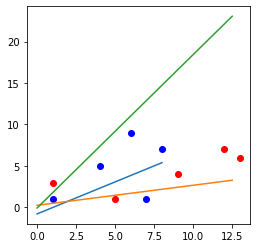

erreur :  0.014990833276355468


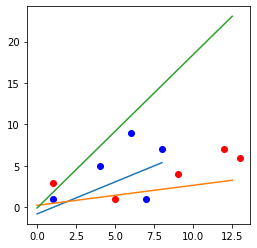

erreur :  0.01493294817474363


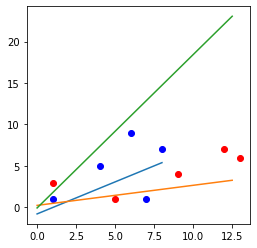

erreur :  0.014875648710954254


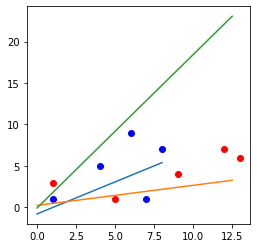

erreur :  0.014818927525858868


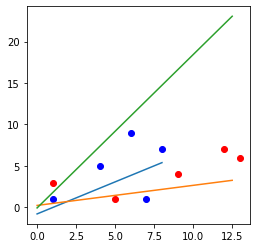

erreur :  0.014762777393446731


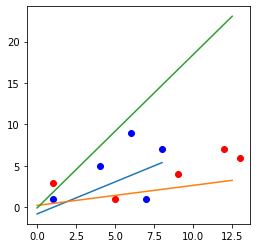

erreur :  0.01470719121667681


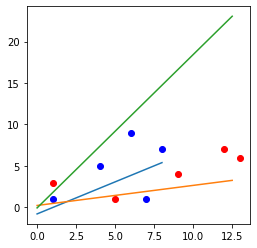

erreur :  0.014652162023435372


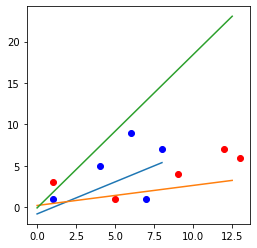

erreur :  0.014597682962597235


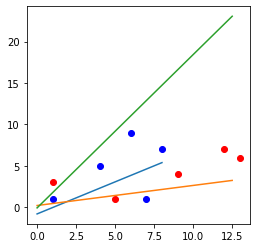

erreur :  0.014543747300187412


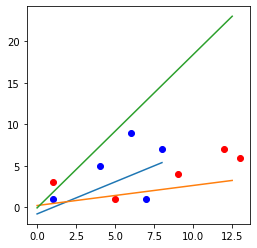

erreur :  0.014490348415638446


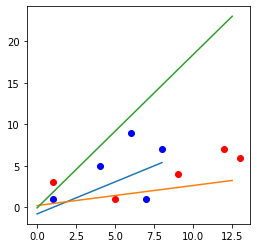

erreur :  0.014437479798140784


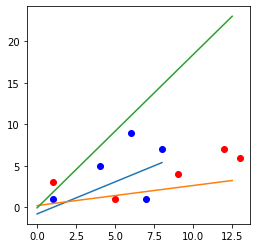

erreur :  0.014385135043084895


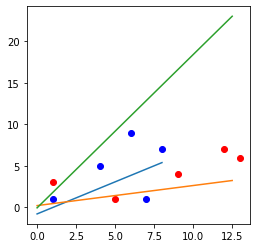

erreur :  0.01433330784859045


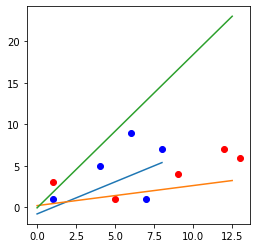

erreur :  0.014281992012119955


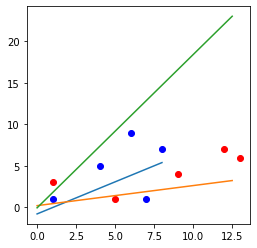

erreur :  0.014231181427176196


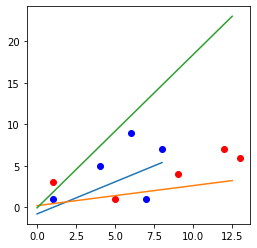

erreur :  0.014180870080079438


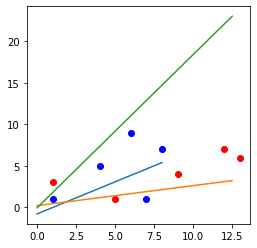

erreur :  0.014131052046823089


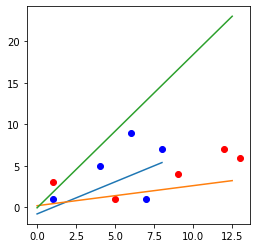

erreur :  0.01408172149000543


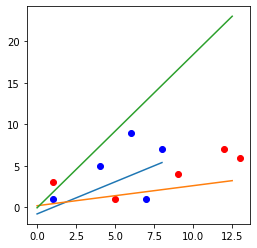

erreur :  0.01403287265583567


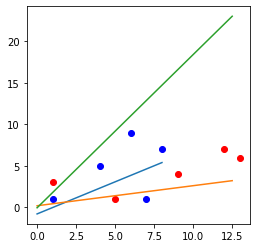

erreur :  0.013984499871213332


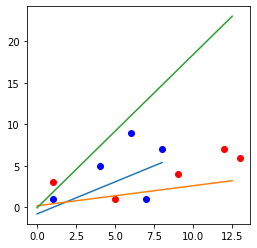

erreur :  0.013936597540877888


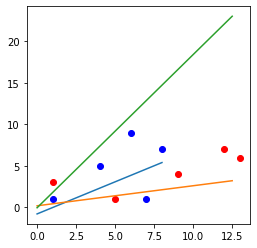

erreur :  0.013889160144628397


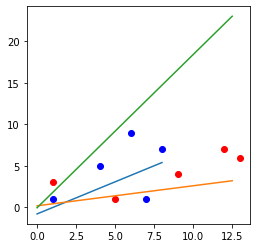

erreur :  0.013842182234611691


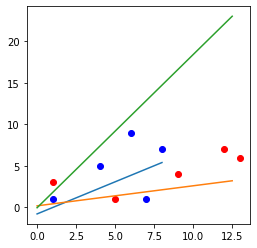

erreur :  0.013795658432677323


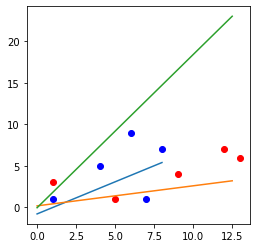

erreur :  0.013749583427798421


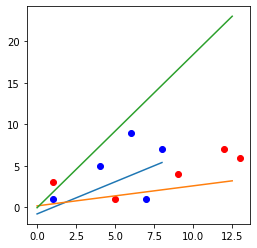

erreur :  0.01370395197355839


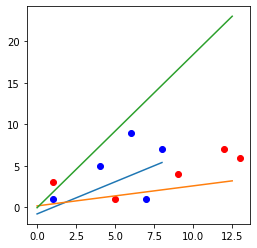

erreur :  0.013658758885700152


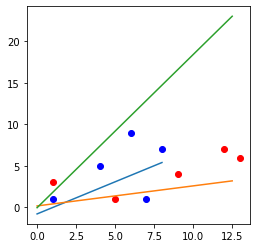

erreur :  0.013613999039740846


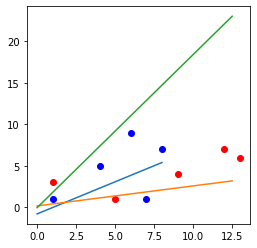

erreur :  0.013569667368647688


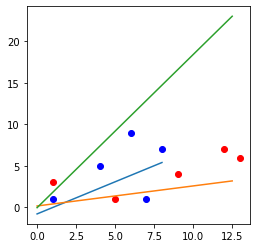

erreur :  0.013525758860576761


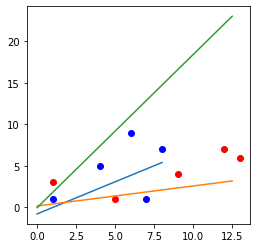

erreur :  0.013482268556673635


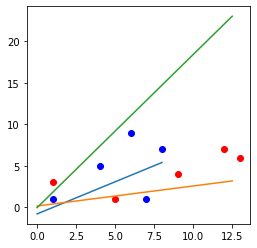

erreur :  0.013439191548934594


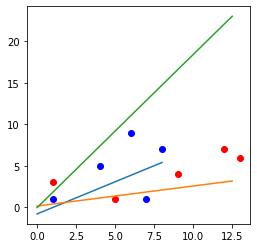

erreur :  0.0133965229781304


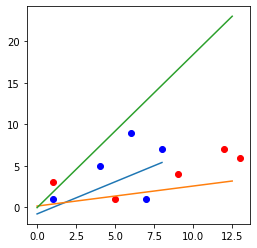

erreur :  0.013354258031789749


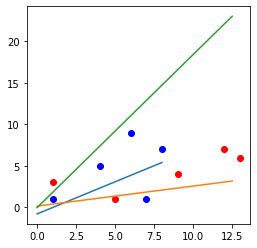

erreur :  0.013312391942244204


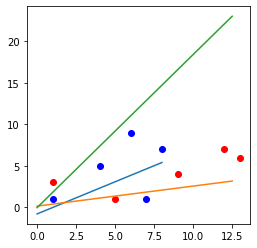

erreur :  0.01327091998473342


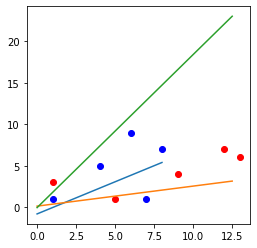

erreur :  0.01322983747557229


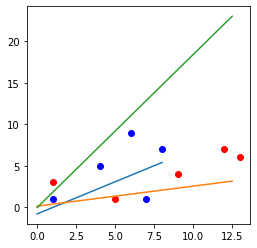

erreur :  0.013189139770377906


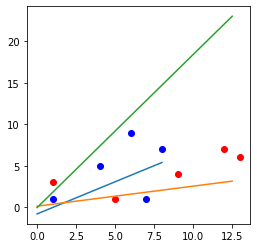

erreur :  0.013148822262358462


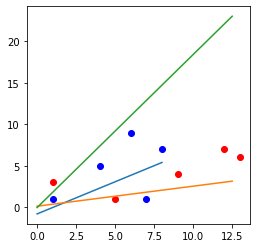

erreur :  0.01310888038066331


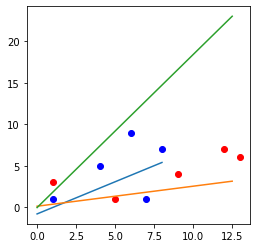

erreur :  0.013069309588794478


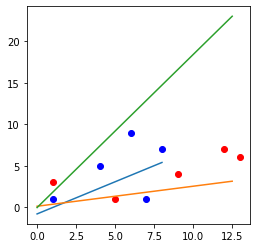

erreur :  0.01303010538308078


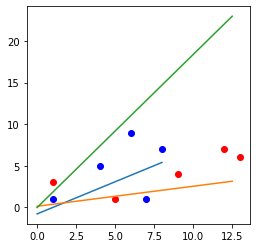

erreur :  0.012991263291213457


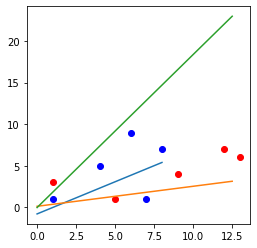

erreur :  0.012952778870845902


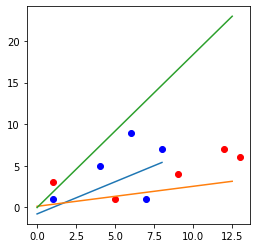

erreur :  0.0129146477082556


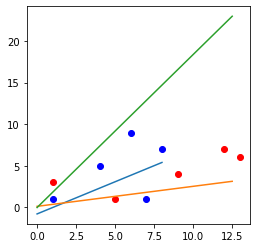

erreur :  0.012876865417069852


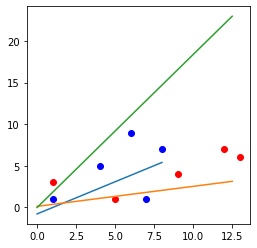

erreur :  0.012839427637056377


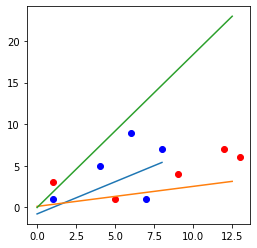

erreur :  0.012802330032977984


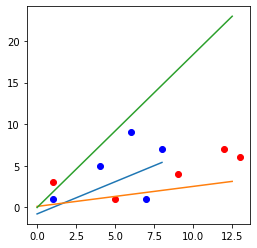

erreur :  0.012765568293512915


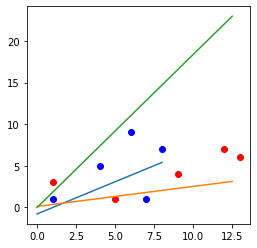

erreur :  0.01272913813024021


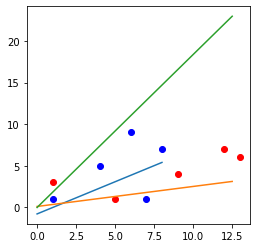

erreur :  0.012693035276692317


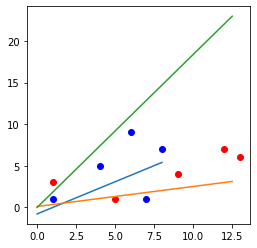

erreur :  0.012657255487472705


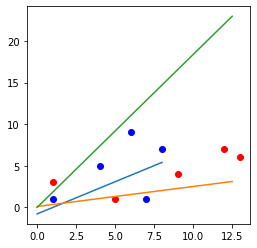

erreur :  0.01262179453744299


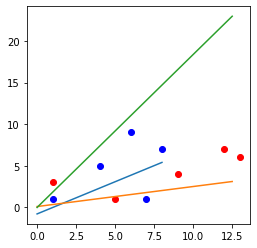

erreur :  0.012586648220974345


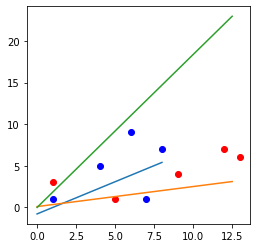

erreur :  0.012551812351270442


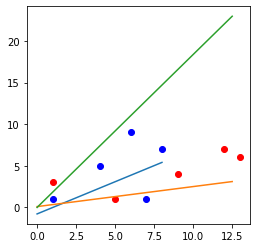

erreur :  0.012517282759755064


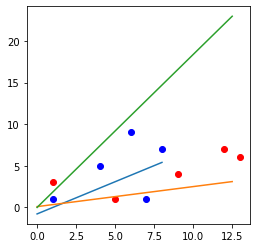

erreur :  0.012483055295530857


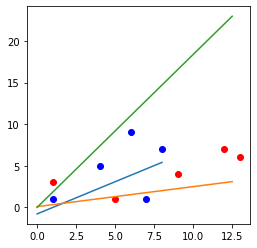

erreur :  0.012449125824905009


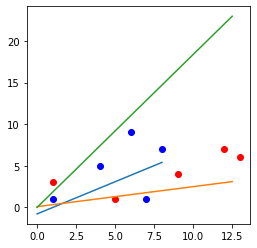

erreur :  0.01241549023098483


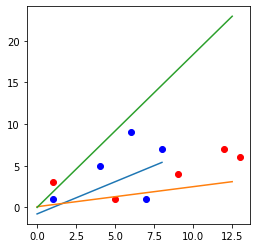

erreur :  0.01238214441334199


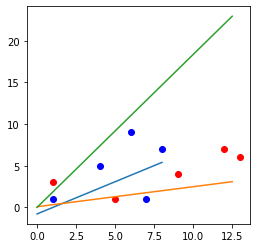

erreur :  0.012349084287744722


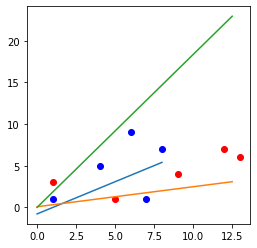

erreur :  0.012316305785960279


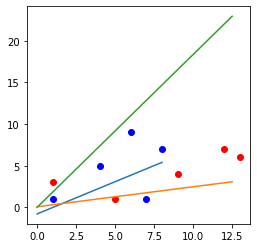

erreur :  0.012283804855624646


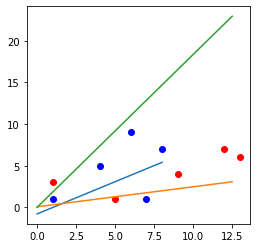

erreur :  0.012251577460181108


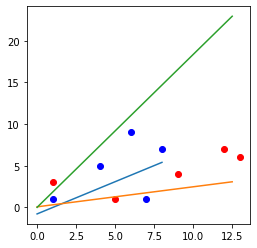

erreur :  0.01221961957888694


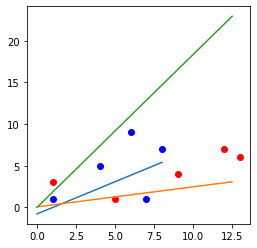

erreur :  0.012187927206886849


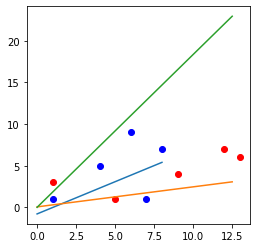

erreur :  0.012156496355353043


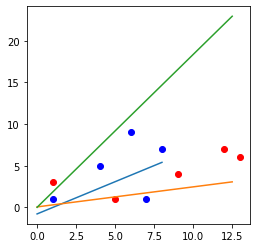

erreur :  0.012125323051692151


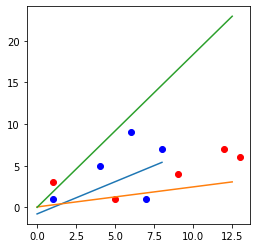

erreur :  0.012094403339816212


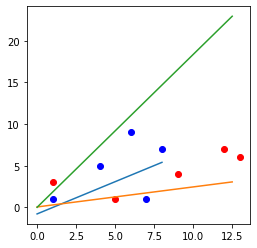

erreur :  0.012063733280477997


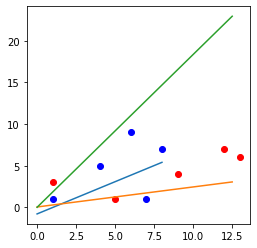

erreur :  0.012033308951669286


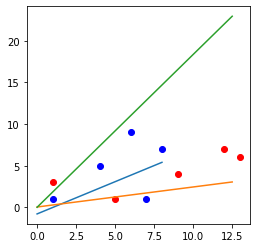

erreur :  0.012003126449080895


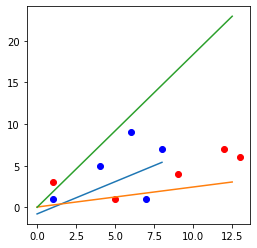

erreur :  0.011973181886622207


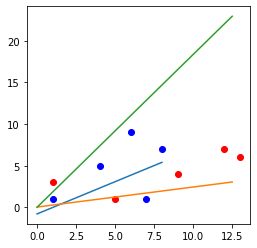

erreur :  0.011943471396999764


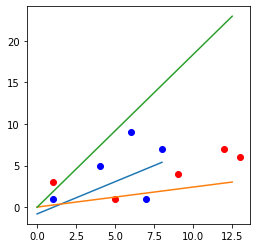

erreur :  0.011913991132353217


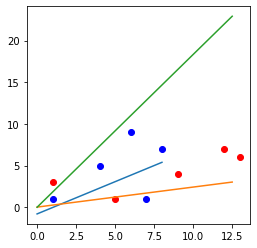

erreur :  0.011884737264944737


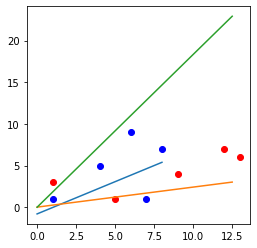

erreur :  0.011855705987903292


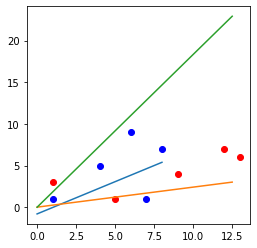

erreur :  0.01182689351601848


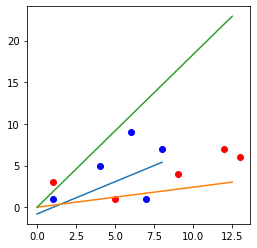

erreur :  0.011798296086583736


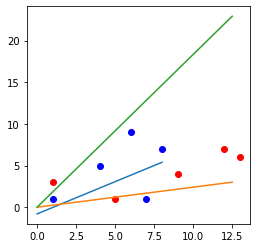

erreur :  0.01176990996028507


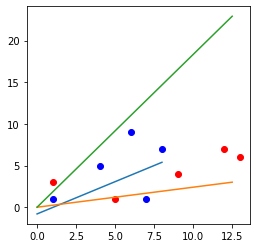

erreur :  0.011741731422134633


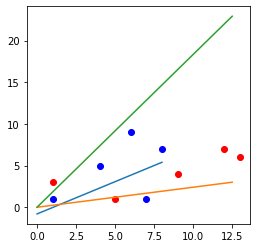

erreur :  0.011713756782444077


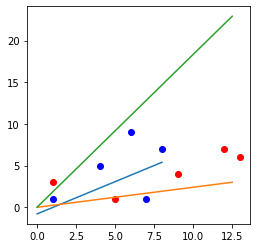

erreur :  0.01168598237783702


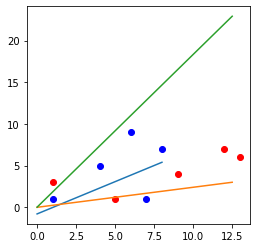

erreur :  0.01165840457229688


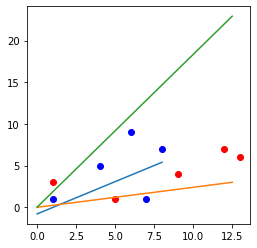

erreur :  0.011631019758246819


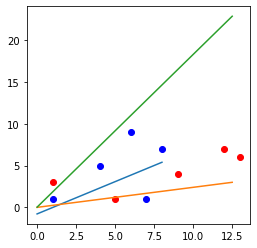

erreur :  0.01160382435765916


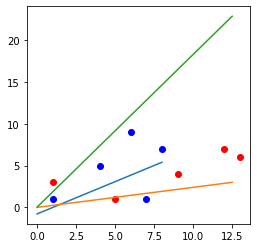

erreur :  0.011576814823191518


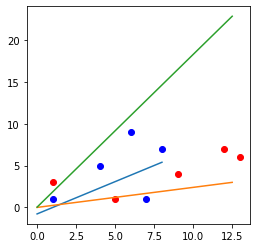

erreur :  0.011549987639344717


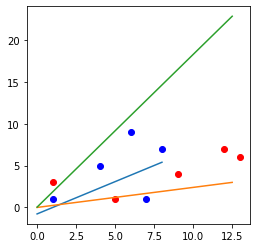

erreur :  0.011523339323641595


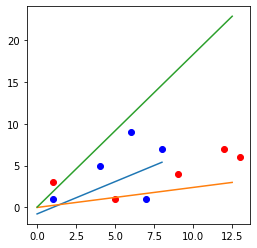

erreur :  0.011496866427821316


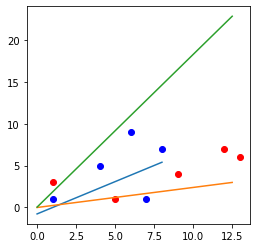

erreur :  0.011470565539046667


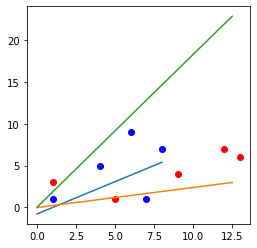

erreur :  0.011444433281120867


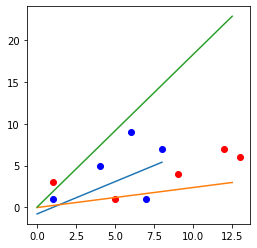

erreur :  0.01141846631570983


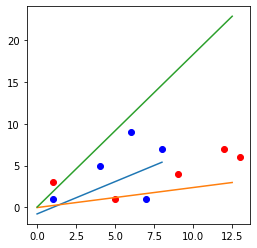

erreur :  0.011392661343567484


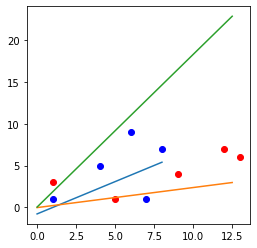

erreur :  0.011367015105759186


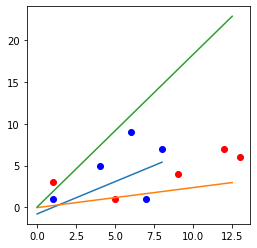

erreur :  0.011341524384880843


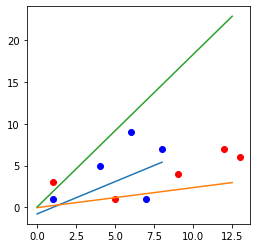

erreur :  0.011316186006269841


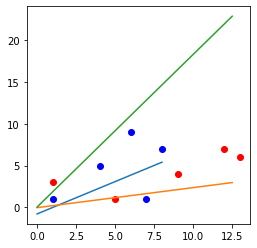

erreur :  0.011290996839204722


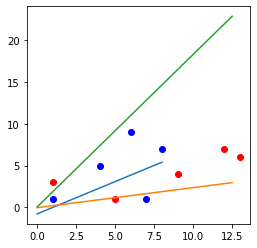

erreur :  0.011265953798089173


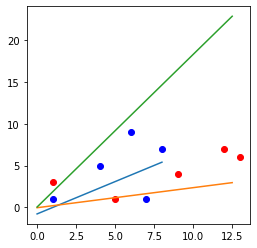

erreur :  0.011241053843618239


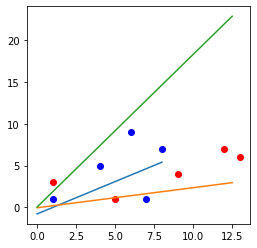

erreur :  0.011216293983923013


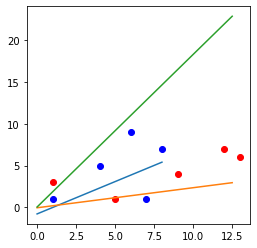

erreur :  0.011191671275689872


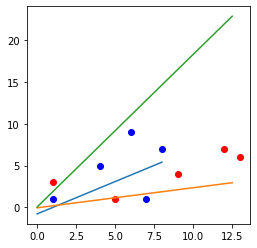

erreur :  0.011167182825253051


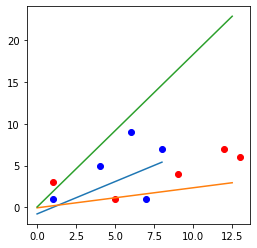

erreur :  0.011142825789655034


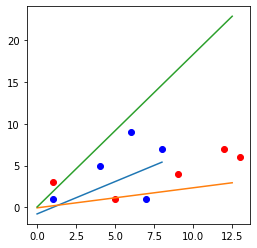

erreur :  0.011118597377674162


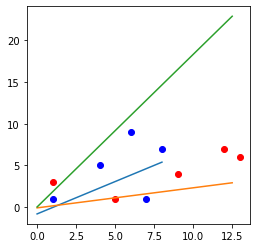

erreur :  0.01109449485081537


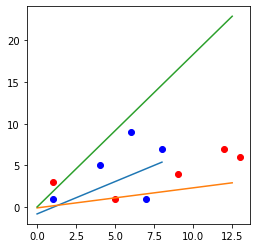

erreur :  0.011070515524262338


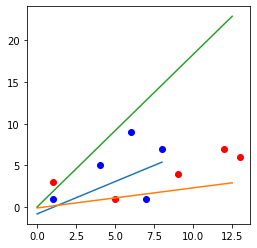

erreur :  0.011046656767787308


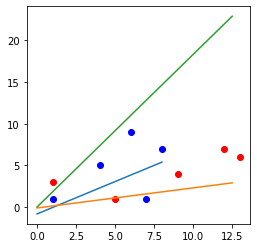

erreur :  0.011022916006617952


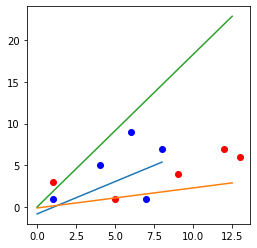

erreur :  0.010999290722257856


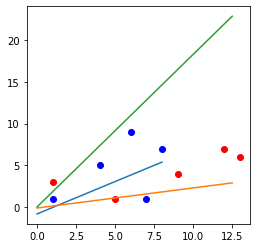

erreur :  0.010975778453258951


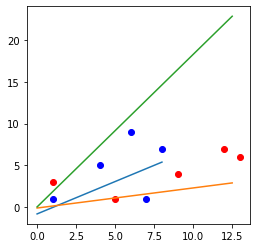

erreur :  0.010952376795944796


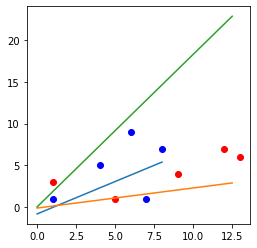

erreur :  0.010929083405081733


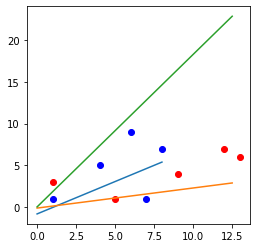

erreur :  0.010905895994497773


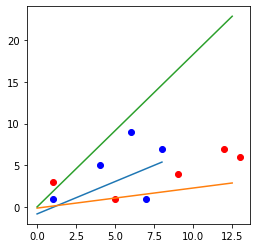

erreur :  0.010882812337647263


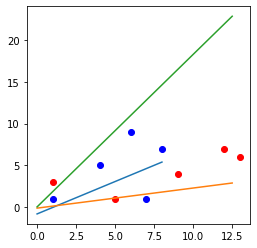

erreur :  0.010859830268120697


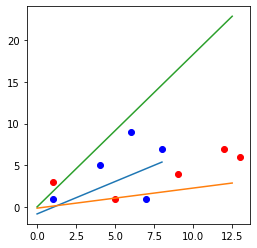

erreur :  0.010836947680098049


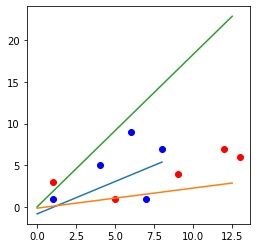

erreur :  0.01081416252874595


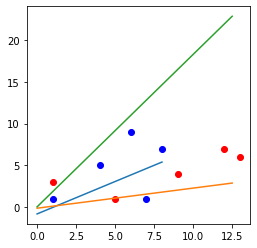

erreur :  0.010791472830557557


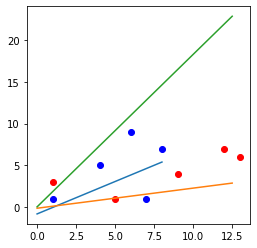

erreur :  0.010768876663634701


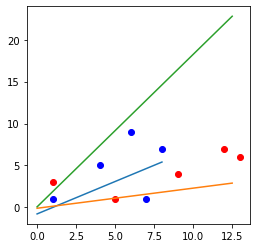

erreur :  0.01074637216791302


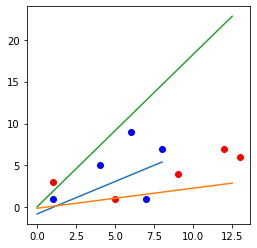

erreur :  0.010723957545329


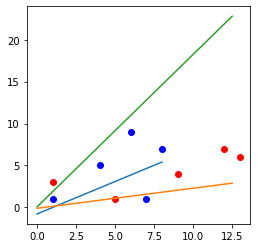

erreur :  0.010701631059930725


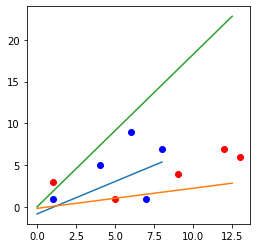

erreur :  0.010679391037930442


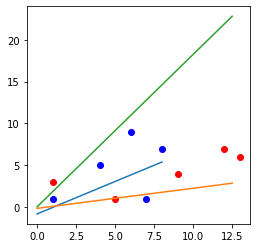

erreur :  0.010657235867702484


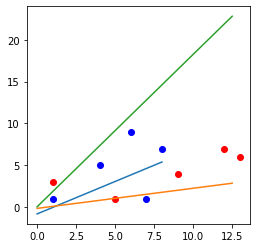

erreur :  0.010635163999724409


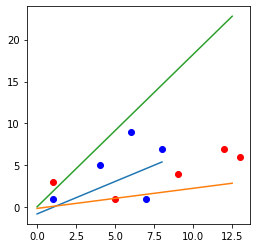

erreur :  0.010613173946465392


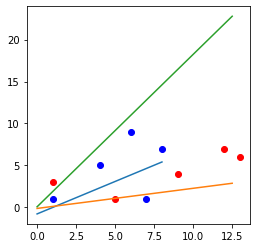

erreur :  0.01059126428221901


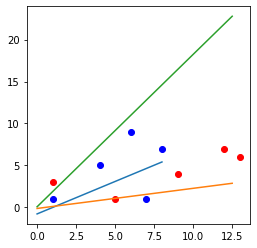

erreur :  0.010569433642886036


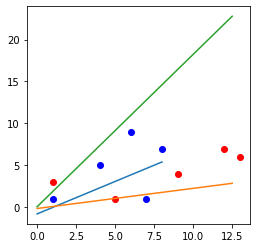

erreur :  0.010547680725705702


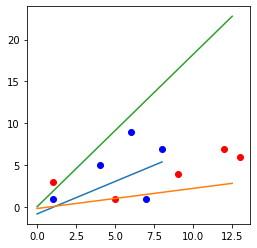

erreur :  0.010526004288935806


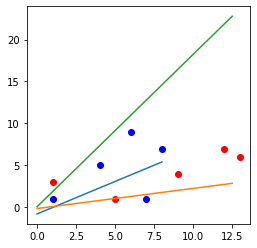

erreur :  0.010504403151492744


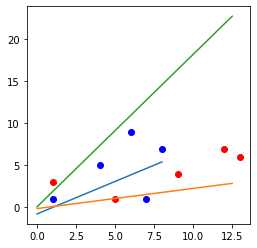

erreur :  0.010482876192527198


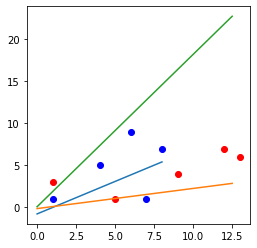

erreur :  0.010461422350995689


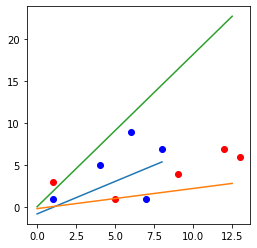

erreur :  0.010440040625110426


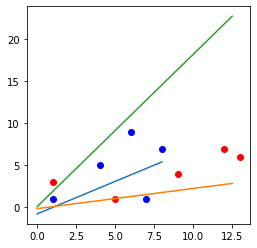

erreur :  0.010418730071901727


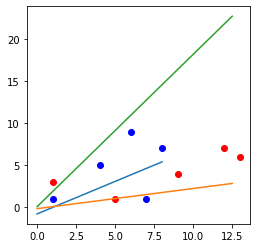

erreur :  0.010397489806460498


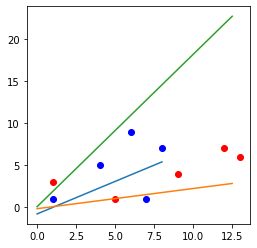

erreur :  0.010376319001656177


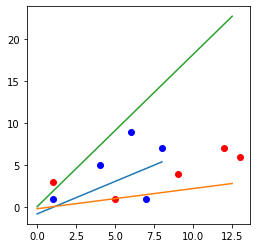

erreur :  0.010355216886905941


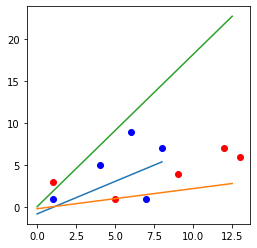

erreur :  0.010334182748543839


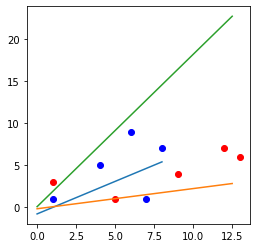

erreur :  0.010313215927263164


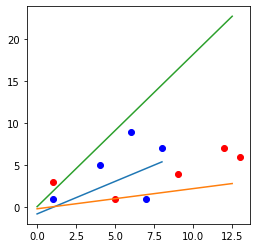

erreur :  0.0102923158206752


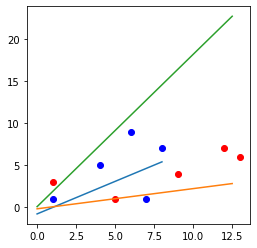

erreur :  0.010271481876720593


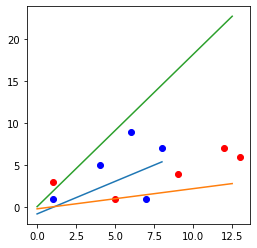

erreur :  0.01025071360326179


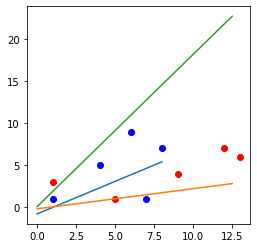

erreur :  0.010230010548824865


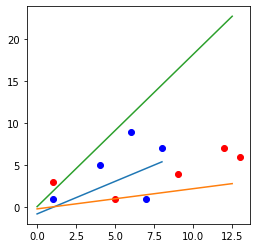

erreur :  0.010209372334770558


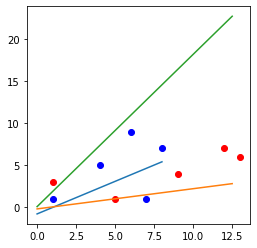

erreur :  0.010188798595350976


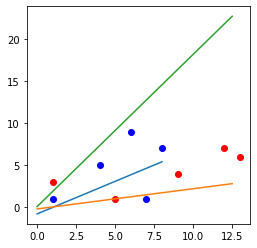

erreur :  0.010168289083254683


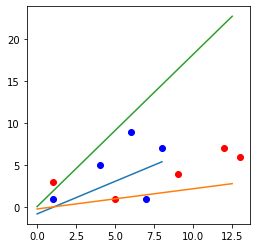

erreur :  0.010147843476525593


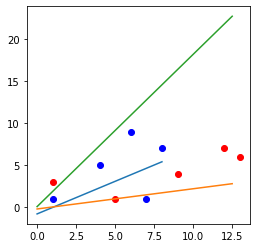

erreur :  0.010127461726652761


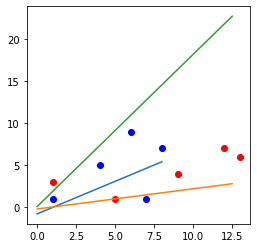

erreur :  0.010107143421334737


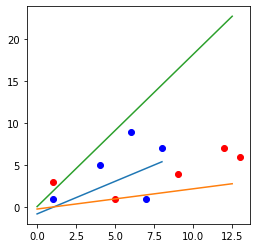

erreur :  0.010086888949896731


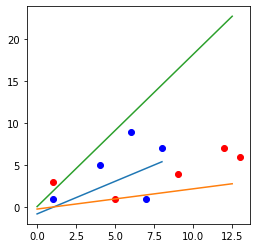

erreur :  0.010066697354253123


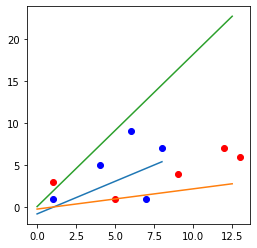

erreur :  0.010046570305232445


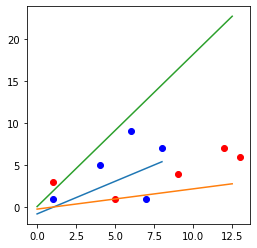

erreur :  0.010026504699610608


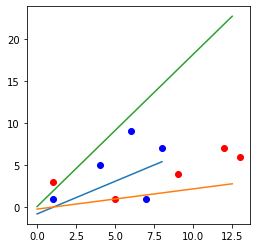

erreur :  0.010006506509111005


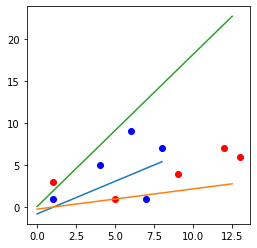

erreur :  0.009986564726041215


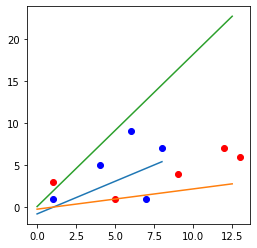

nombre d'itérations parcourus: 516
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
[{'weights': [2.8204515531498813, -3.637328597312874, -2.8925950246772607], 'output': 0.9958953570618417, 'delta': 0.0001123361857179564}, {'weights': [1.0500167377524268, -4.3631579206120765, -1.0092281007769168], 'output': 5.883390074353302e-09, 'delta': -9.434480763980604e-11}, {'weights': [-4.696250264772406, 2.5970480856590967, -0.20408319728600524], 'output': 2.1472690081711008e-17, 'delta': 5.421516727647978e-19}]
[{'weights': [-5.729879789100924, 3.3855983174048667, -5.308647583999163, 2.751236798323216], 'output': 0.049494901566671023, 'delta': -0.0023396724639143883}, {'weights': [5.716540161717704, -3.365046616113692, 5.319620715771278, -2.754211960139281], 'output': 0.9497345148378169, 'delta': 0.002411437255548184}]


In [ ]:
# Test making predictions with the network
dataset1 = [[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]]

dataset = [[1,1,0],
[4,5,0],
[6,9,0],
[8,7,0],
[7,1,0],
[1,3,1],
[5,1,1],
[13,6,1],
[9,4,1],
[12,7,1]]

n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 3, n_outputs)

train_network(network, dataset, 0.5, 0, n_outputs)

for row in dataset:
    prediction = predict(network, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

        
for layer in network:
    print(layer)
    

